# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg
%matplotlib inline
import pandas as pd 
import pandas_datareader as web 
import datetime
import statistics as stats
from statsmodels.stats import weightstats
from datetime import datetime
import sklearn.preprocessing as preproc
import altair as alt
from bokeh.io import curdoc, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper, Slider
from bokeh.palettes import Spectral6
from bokeh.layouts import Column, row
import country_converter as coco
from pycountry import countries
from pycountry import pycountry
import plotly.express as px
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

# 2. Importing Dataset

In [2]:
df_original = pd.read_csv('UNE_EDUC_A.csv')
df = df_original.copy()

In [3]:
df.head(5)

DATAFLOW        LAST UPDATE freq sex isced11     age    unit  \
0  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   F   ED0-2  Y15-74  PC_ACT   
1  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   F   ED0-2  Y15-74  PC_ACT   
2  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   F   ED0-2  Y15-74  PC_ACT   
3  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   F   ED0-2  Y15-74  PC_ACT   
4  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   F   ED0-2  Y15-74  PC_ACT   

  geo  TIME_PERIOD  OBS_VALUE OBS_FLAG  
0  AT         2013        9.6      NaN  
1  AT         2014       10.4      NaN  
2  AT         2015       10.0      NaN  
3  AT         2016       11.3      NaN  
4  AT         2017       11.6      NaN

In [4]:
df.shape

(13278, 11)

# Data Exploration

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13278 entries, 0 to 13277
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     13278 non-null  object 
 1   LAST UPDATE  13278 non-null  object 
 2   freq         13278 non-null  object 
 3   sex          13278 non-null  object 
 4   isced11      13278 non-null  object 
 5   age          13278 non-null  object 
 6   unit         13278 non-null  object 
 7   geo          13278 non-null  object 
 8   TIME_PERIOD  13278 non-null  int64  
 9   OBS_VALUE    13252 non-null  float64
 10  OBS_FLAG     864 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.1+ MB
None


In [6]:
df.describe()

TIME_PERIOD     OBS_VALUE
count  13278.000000  13252.000000
mean    2017.759452     21.509878
std        2.950340     17.302445
min     2013.000000      0.800000
25%     2015.000000      7.500000
50%     2018.000000     16.500000
75%     2021.000000     30.900000
max     2022.000000     76.100000

# Pre-Processing Data

## Data Cleaning

In [7]:
df.isnull().any()

DATAFLOW       False
LAST UPDATE    False
freq           False
sex            False
isced11        False
age            False
unit           False
geo            False
TIME_PERIOD    False
OBS_VALUE       True
OBS_FLAG        True
dtype: bool

In [8]:
df.isnull().sum()

DATAFLOW           0
LAST UPDATE        0
freq               0
sex                0
isced11            0
age                0
unit               0
geo                0
TIME_PERIOD        0
OBS_VALUE         26
OBS_FLAG       12414
dtype: int64

In [9]:
df.tail(5)

DATAFLOW        LAST UPDATE freq sex isced11     age  \
13273  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   T   ED5-8  Y25-74   
13274  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   T   ED5-8  Y25-74   
13275  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   T   ED5-8  Y25-74   
13276  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   T   ED5-8  Y25-74   
13277  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   T   ED5-8  Y25-74   

         unit geo  TIME_PERIOD  OBS_VALUE OBS_FLAG  
13273  PC_UNE  SE         2022       29.6      NaN  
13274  PC_UNE  SI         2021       34.9      NaN  
13275  PC_UNE  SI         2022       32.6      NaN  
13276  PC_UNE  SK         2021       14.4      NaN  
13277  PC_UNE  SK         2022       12.9      NaN

In [10]:
df = df.drop(['OBS_FLAG','freq','LAST UPDATE', 'DATAFLOW'], axis =1)
df.head(5)

sex isced11     age    unit geo  TIME_PERIOD  OBS_VALUE
0   F   ED0-2  Y15-74  PC_ACT  AT         2013        9.6
1   F   ED0-2  Y15-74  PC_ACT  AT         2014       10.4
2   F   ED0-2  Y15-74  PC_ACT  AT         2015       10.0
3   F   ED0-2  Y15-74  PC_ACT  AT         2016       11.3
4   F   ED0-2  Y15-74  PC_ACT  AT         2017       11.6

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13278 entries, 0 to 13277
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          13278 non-null  object 
 1   isced11      13278 non-null  object 
 2   age          13278 non-null  object 
 3   unit         13278 non-null  object 
 4   geo          13278 non-null  object 
 5   TIME_PERIOD  13278 non-null  int64  
 6   OBS_VALUE    13252 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 726.3+ KB
None


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

sex             0
isced11         0
age             0
unit            0
geo             0
TIME_PERIOD     0
OBS_VALUE      26
dtype: int64

# Missing Values Analysis

In [14]:
null_index = df[df['OBS_VALUE'].isnull()].index
print(null_index)

Int64Index([ 825,  826,  832,  834, 1159, 1160, 1166, 1168, 1365, 1366, 1382,
            1434, 1435, 1451, 7541, 7606, 7607, 7874, 7939, 7940, 8207, 8272,
            8273, 8540, 8605, 8606],
           dtype='int64')


In [16]:
time_period_counts = missing_values_df['TIME_PERIOD'].value_counts()
print(time_period_counts)

2016    8
2021    4
2022    4
2015    4
2020    2
2017    2
2019    2
Name: TIME_PERIOD, dtype: int64


## Which geo (country/region) has the most missing values?

In [17]:
geo_counts = missing_values_df['geo'].value_counts()
print(geo_counts)

IE    8
IS    8
MT    8
NO    2
Name: geo, dtype: int64


The "Unemployment statistics" published by Eurostat (Eurostat, 2023) contain data that reveal sporadic errors in reporting. This is especially clear in the years 2021 and 2022, where there don't seem to be many meaningful data points. The biggest discrepancies are seen in nations like Luxembourg, Malta, and Iceland.

## Which education level (isced11) has the most missing values?

In [18]:
edu_counts = missing_values_df['isced11'].value_counts()
print(edu_counts)

ED0-2    14
ED5-8    12
Name: isced11, dtype: int64


In [19]:
df['OBS_VALUE'].interpolate(method='linear', inplace=True)

Source[Stack Overflow. (2018) 'Missing values in time series in Python', Stack Overflow. Available at: https://stackoverflow.com/questions/49308530/missing-values-in-time-series-in-python (Accessed: 2 August 2023)]

In [20]:
df.isnull().sum()

sex            0
isced11        0
age            0
unit           0
geo            0
TIME_PERIOD    0
OBS_VALUE      0
dtype: int64

In [21]:
df['unit'].unique()

array(['PC_ACT', 'PC_UNE'], dtype=object)

In [22]:
df['age'].unique()

array(['Y15-74', 'Y20-64', 'Y25-74'], dtype=object)

In [23]:
df['sex'].unique()

array(['F', 'M', 'T'], dtype=object)

In [24]:
df['geo'].unique()

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES',
       'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'ME',
       'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK',
       'TR'], dtype=object)

In [25]:
df['isced11'].unique()

array(['ED0-2', 'ED3_4', 'ED5-8'], dtype=object)

# Categorical Data Handling

## Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
# Creating a label encoder object
label_encoder = LabelEncoder()

# Label encoding for 'age' and 'isced11'
df['age_encoded'] = label_encoder.fit_transform(df['age'])
df['isced11_encoded'] = label_encoder.fit_transform(df['isced11'])


# One-Hot Encoding

In [28]:
# One-hot encoding for 'unit', 'sex', and 'geo'
df = pd.get_dummies(df, columns=['unit', 'sex', 'geo'], drop_first=True)

In [29]:
df.head(2)

isced11     age  TIME_PERIOD  OBS_VALUE  age_encoded  isced11_encoded  \
0   ED0-2  Y15-74         2013        9.6            0                0   
1   ED0-2  Y15-74         2014       10.4            0                0   

   unit_PC_UNE  sex_M  sex_T  geo_BE  ...  geo_NL  geo_NO  geo_PL  geo_PT  \
0            0      0      0       0  ...       0       0       0       0   
1            0      0      0       0  ...       0       0       0       0   

   geo_RO  geo_RS  geo_SE  geo_SI  geo_SK  geo_TR  
0       0       0       0       0       0       0  
1       0       0       0       0       0       0  

[2 rows x 42 columns]

In [30]:
df.describe()

TIME_PERIOD     OBS_VALUE   age_encoded  isced11_encoded  \
count  13278.000000  13278.000000  13278.000000     13278.000000   
mean    2017.759452     21.488816      0.642115         0.999849   
std        2.950340     17.295517      0.647550         0.816435   
min     2013.000000      0.800000      0.000000         0.000000   
25%     2015.000000      7.500000      0.000000         0.000000   
50%     2018.000000     16.500000      1.000000         1.000000   
75%     2021.000000     30.800000      1.000000         2.000000   
max     2022.000000     76.100000      2.000000         2.000000   

        unit_PC_UNE         sex_M         sex_T        geo_BE        geo_BG  \
count  13278.000000  13278.000000  13278.000000  13278.000000  13278.000000   
mean       0.500000      0.333183      0.333484      0.029824      0.029824   
std        0.500019      0.471369      0.471476      0.170107      0.170107   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.500000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             geo_CH  ...        geo_NL        geo_NO        geo_PL  \
count  13278.000000  ...  13278.000000  13278.000000  13278.000000   
mean       0.029824  ...      0.029824      0.029824      0.029824   
std        0.170107  ...      0.170107      0.170107      0.170107   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      0.000000      0.000000   
50%        0.000000  ...      0.000000      0.000000      0.000000   
75%        0.000000  ...      0.000000      0.000000      0.000000   
max        1.000000  ...      1.000000      1.000000      1.000000   

             geo_PT        geo_RO        geo_RS        geo_SE        geo_SI  \
count  13278.000000  13278.000000  13278.000000  13278.000000  13278.000000   
mean       0.029824      0.040669      0.029824      0.029824      0.029824   
std        0.170107      0.197529      0.170107      0.170107      0.170107   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             geo_SK        geo_TR  
count  13278.000000  13278.000000  
mean       0.029824      0.021690  
std        0.170107      0.145675  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 40 columns]

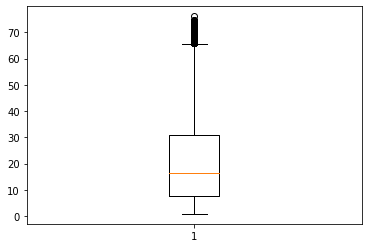

In [31]:
import matplotlib.pyplot as plt

# Boxplot for 'OBS_VALUE'
plt.boxplot(df['OBS_VALUE'])
plt.show()


# Outliers Detection

In [32]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['OBS_VALUE']))
df_with_outliers = df[z_scores > 3]


In [33]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['OBS_VALUE']))
outliers_z_score_indices = np.where(z_scores > 3)[0]
df_with_outliers = df.iloc[outliers_z_score_indices]

# Using IQR
Q1 = df['OBS_VALUE'].quantile(0.25)
Q3 = df['OBS_VALUE'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['OBS_VALUE'] < (Q1 - 1.5 * IQR)) | (df['OBS_VALUE'] > (Q3 + 1.5 * IQR))].index

print(f"Outlier indices using Z-score: {outliers_z_score_indices}")
print(f"Outlier indices using IQR: {outliers_iqr}")


Outlier indices using Z-score: [5654 5656 6369 6373 6374 6448 6451 6543 7085 7211 7215]
Outlier indices using IQR: Int64Index([ 1858,  1859,  1860,  1863,  1865,  1866,  1940,  1941,  1946,
             1991,
            ...
            11589, 11592, 11593, 11644, 11645, 11646, 11742, 11758, 11780,
            11781],
           dtype='int64', length=293)


<AxesSubplot:xlabel='OBS_VALUE', ylabel='Count'>

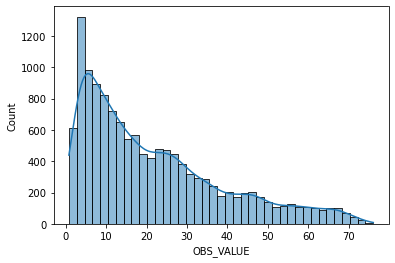

In [34]:
sns.histplot(data=df, x='OBS_VALUE', kde=True)

# The OBS_VALUE Central Tendency Analysis


In [35]:
mean_value = df['OBS_VALUE'].mean()
median_value = df['OBS_VALUE'].median()
mode_value = df['OBS_VALUE'].mode()[0]
print(f"Mean: {mean_value}, Median: {median_value}, Mode: {mode_value}")

Mean: 21.48881608676012, Median: 16.5, Mode: 4.0


# Visual Exploration

<AxesSubplot:xlabel='OBS_VALUE'>

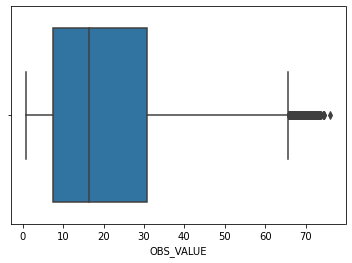

In [36]:
sns.boxplot(data=df, x='OBS_VALUE')

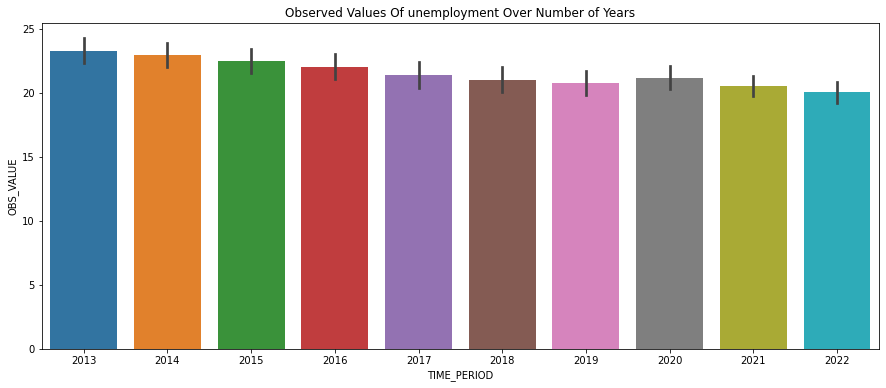

In [37]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Observed Values Of unemployment Over Number of Years")
ax=sns.barplot(x="TIME_PERIOD", y="OBS_VALUE", data=df )

In [38]:
# This will give us a list of all columns that were created for 'geo' after one-hot encoding
geo_columns = [col for col in df.columns if col.startswith('geo_')]


In [39]:
# This will sum up the 1's in each of the 'geo_' columns, which represents the count of observations for each country
geo_counts = df[geo_columns].sum()

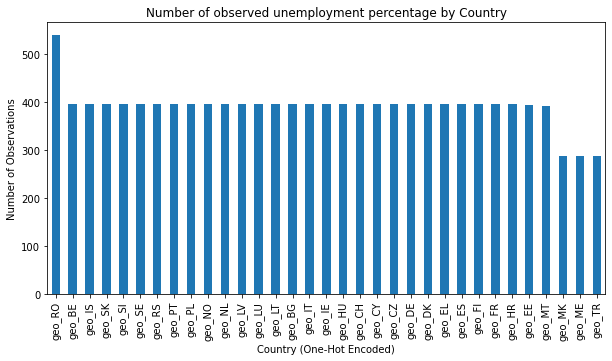

In [40]:
geo_counts.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Number of observed unemployment percentage by Country")
plt.ylabel("Number of Observations")
plt.xlabel("Country (One-Hot Encoded)")
plt.show()


In [41]:
print(df['TIME_PERIOD'].unique())

[2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


In [42]:
df_macedonia = df[df['geo_MK']== 1]

In [43]:
df_macedonia.head(2)

isced11     age  TIME_PERIOD  OBS_VALUE  age_encoded  isced11_encoded  \
218   ED0-2  Y15-74         2013       32.2            0                0   
219   ED0-2  Y15-74         2014       31.0            0                0   

     unit_PC_UNE  sex_M  sex_T  geo_BE  ...  geo_NL  geo_NO  geo_PL  geo_PT  \
218            0      0      0       0  ...       0       0       0       0   
219            0      0      0       0  ...       0       0       0       0   

     geo_RO  geo_RS  geo_SE  geo_SI  geo_SK  geo_TR  
218       0       0       0       0       0       0  
219       0       0       0       0       0       0  

[2 rows x 42 columns]

In [44]:
print(df_macedonia.head())
print(df_macedonia.shape)


    isced11     age  TIME_PERIOD  OBS_VALUE  age_encoded  isced11_encoded  \
218   ED0-2  Y15-74         2013       32.2            0                0   
219   ED0-2  Y15-74         2014       31.0            0                0   
220   ED0-2  Y15-74         2015       27.0            0                0   
221   ED0-2  Y15-74         2016       26.5            0                0   
222   ED0-2  Y15-74         2017       20.7            0                0   

     unit_PC_UNE  sex_M  sex_T  geo_BE  ...  geo_NL  geo_NO  geo_PL  geo_PT  \
218            0      0      0       0  ...       0       0       0       0   
219            0      0      0       0  ...       0       0       0       0   
220            0      0      0       0  ...       0       0       0       0   
221            0      0      0       0  ...       0       0       0       0   
222            0      0      0       0  ...       0       0       0       0   

     geo_RO  geo_RS  geo_SE  geo_SI  geo_SK  geo_TR  
218     

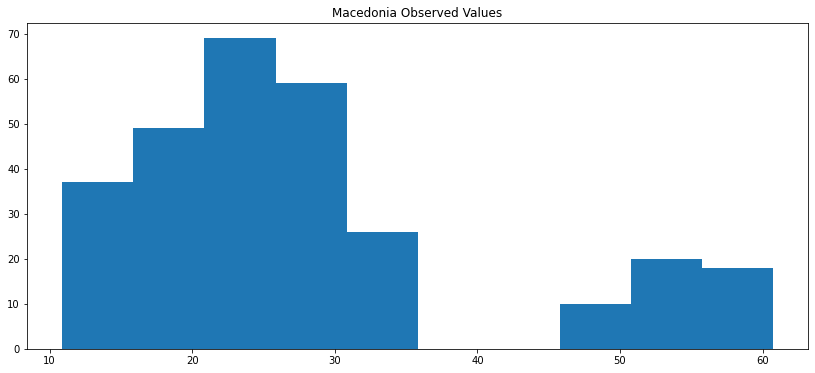

In [45]:
import matplotlib
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(14,6))
plt.title('Macedonia Observed Values')
pyplot.hist(df_macedonia['OBS_VALUE'])
pyplot.show()

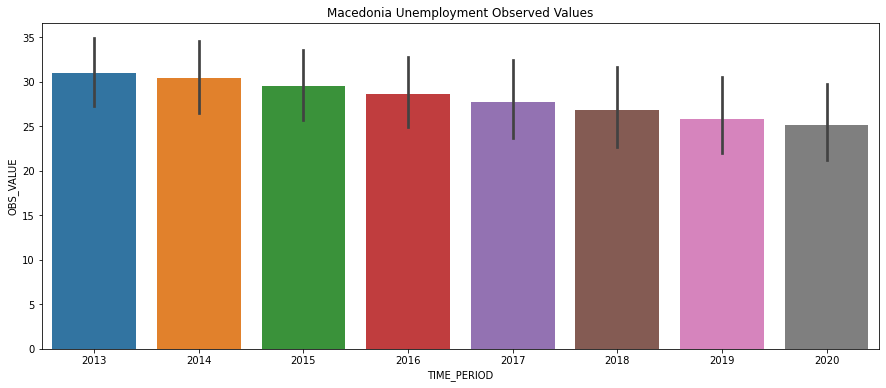

In [46]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title('Macedonia Unemployment Observed Values')
ax=sns.barplot(x="TIME_PERIOD", y="OBS_VALUE", data=df_macedonia )

In [47]:
df['geo_ME'] == 1

0        False
1        False
2        False
3        False
4        False
         ...  
13273    False
13274    False
13275    False
13276    False
13277    False
Name: geo_ME, Length: 13278, dtype: bool

In [48]:
df_montenegro = df[df['geo_ME']== 1]

In [49]:
df_montenegro.head(2)

isced11     age  TIME_PERIOD  OBS_VALUE  age_encoded  isced11_encoded  \
210   ED0-2  Y15-74         2013       43.8            0                0   
211   ED0-2  Y15-74         2014       33.5            0                0   

     unit_PC_UNE  sex_M  sex_T  geo_BE  ...  geo_NL  geo_NO  geo_PL  geo_PT  \
210            0      0      0       0  ...       0       0       0       0   
211            0      0      0       0  ...       0       0       0       0   

     geo_RO  geo_RS  geo_SE  geo_SI  geo_SK  geo_TR  
210       0       0       0       0       0       0  
211       0       0       0       0       0       0  

[2 rows x 42 columns]

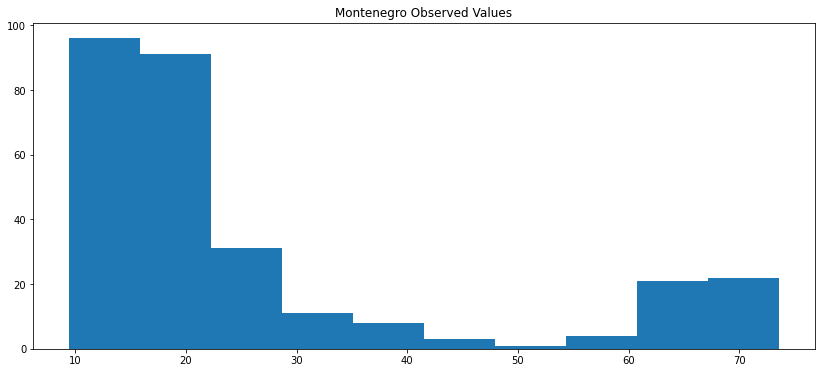

In [50]:
import matplotlib
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(14,6))
plt.title('Montenegro Observed Values')
pyplot.hist(df_montenegro['OBS_VALUE'])
pyplot.show()

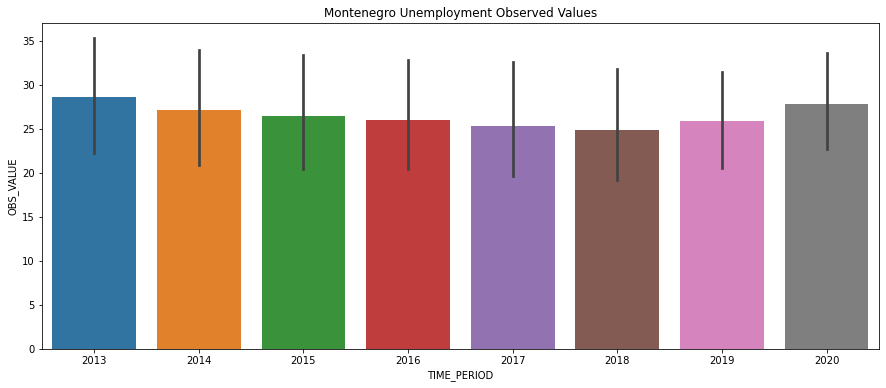

In [51]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title('Montenegro Unemployment Observed Values')
ax=sns.barplot(x="TIME_PERIOD", y="OBS_VALUE", data=df_montenegro )

In [52]:
df['geo_TR'] == 1

0        False
1        False
2        False
3        False
4        False
         ...  
13273    False
13274    False
13275    False
13276    False
13277    False
Name: geo_TR, Length: 13278, dtype: bool

In [53]:
df_turkey = df[df['geo_TR']== 1]

In [54]:
df_turkey.head(2)

isced11     age  TIME_PERIOD  OBS_VALUE  age_encoded  isced11_encoded  \
326   ED0-2  Y15-74         2013        7.3            0                0   
327   ED0-2  Y15-74         2014        8.3            0                0   

     unit_PC_UNE  sex_M  sex_T  geo_BE  ...  geo_NL  geo_NO  geo_PL  geo_PT  \
326            0      0      0       0  ...       0       0       0       0   
327            0      0      0       0  ...       0       0       0       0   

     geo_RO  geo_RS  geo_SE  geo_SI  geo_SK  geo_TR  
326       0       0       0       0       0       1  
327       0       0       0       0       0       1  

[2 rows x 42 columns]

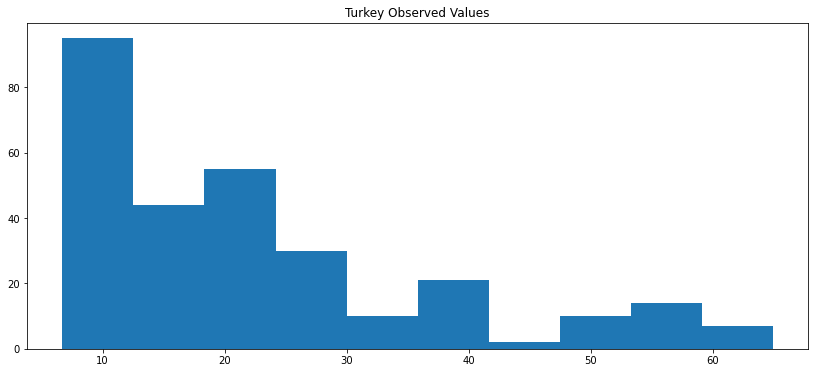

In [55]:
import matplotlib
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(14,6))
plt.title('Turkey Observed Values')
pyplot.hist(df_turkey['OBS_VALUE'])
pyplot.show()

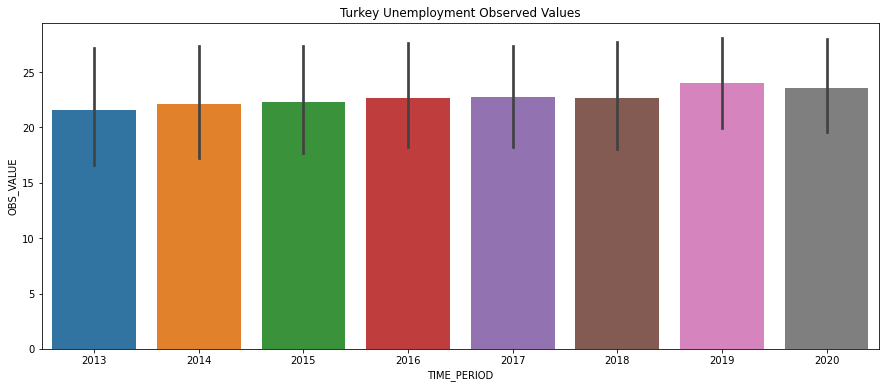

In [56]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title('Turkey Unemployment Observed Values')
ax=sns.barplot(x="TIME_PERIOD", y="OBS_VALUE", data=df_turkey )

Text(0, 0.5, 'OBS_VALUE')

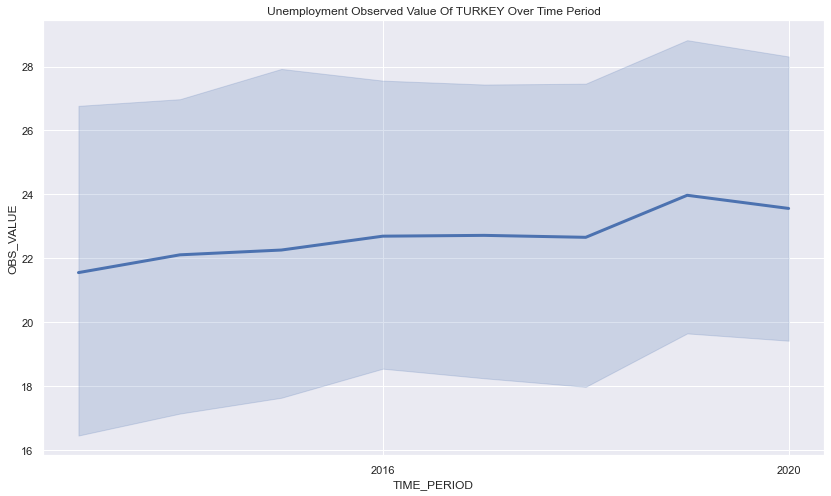

In [57]:
import matplotlib.ticker as ticker
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_turkey, x='TIME_PERIOD', y='OBS_VALUE', palette='viridis', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.title('Unemployment Observed Value Of TURKEY Over Time Period')
plt.ylabel('OBS_VALUE')


In [58]:
df_geototal = df.filter(like='geo_').sum().sort_values(ascending=False)
df_geototal

geo_RO    540
geo_BE    396
geo_IS    396
geo_SK    396
geo_SI    396
geo_SE    396
geo_RS    396
geo_PT    396
geo_PL    396
geo_NO    396
geo_NL    396
geo_LV    396
geo_LU    396
geo_LT    396
geo_BG    396
geo_IT    396
geo_IE    396
geo_HU    396
geo_CH    396
geo_CY    396
geo_CZ    396
geo_DE    396
geo_DK    396
geo_EL    396
geo_ES    396
geo_FI    396
geo_FR    396
geo_HR    396
geo_EE    394
geo_MT    392
geo_MK    288
geo_ME    288
geo_TR    288
dtype: int64

In [59]:
output_notebook()

Loading BokehJS ...

In [60]:
df = df[df['geo_EL'] != 1]


In [61]:
def get_country_code(row):
    for col in df.columns:
        if col.startswith('geo_') and row[col] == 1:
            return col.replace('geo_', '')


In [62]:
df['geo'] = df.apply(get_country_code, axis=1)


In [63]:
country_names = []

for code in df["geo"]:
    try:
        # Try to get the country name from the code
        country = pycountry.countries.get(alpha_2=code)
        country_name = country.name
    except AttributeError:
        # This will handle cases where the country code is not recognized
        country_name = "Unknown"
    except LookupError:
        # This will handle cases where the country code is not a string (e.g., NaN)
        country_name = "Unknown"
    
    # Append the country name (or "Unknown") to the list
    country_names.append(country_name)


In [64]:
df["country_name"]=country_names

In [65]:
df_2021 = df.query("TIME_PERIOD==2021")
df_2021.head()

isced11     age  TIME_PERIOD  OBS_VALUE  age_encoded  isced11_encoded  \
8    ED0-2  Y15-74         2021       12.5            0                0   
18   ED0-2  Y15-74         2021       15.1            0                0   
28   ED0-2  Y15-74         2021       18.4            0                0   
38   ED0-2  Y15-74         2021       10.0            0                0   
48   ED0-2  Y15-74         2021        9.8            0                0   

    unit_PC_UNE  sex_M  sex_T  geo_BE  ...  geo_PL  geo_PT  geo_RO  geo_RS  \
8             0      0      0       0  ...       0       0       0       0   
18            0      0      0       1  ...       0       0       0       0   
28            0      0      0       0  ...       0       0       0       0   
38            0      0      0       0  ...       0       0       0       0   
48            0      0      0       0  ...       0       0       0       0   

    geo_SE  geo_SI  geo_SK  geo_TR   geo  country_name  
8        0       0       0       0  None       Unknown  
18       0       0       0       0    BE       Belgium  
28       0       0       0       0    BG      Bulgaria  
38       0       0       0       0    CH   Switzerland  
48       0       0       0       0    CY        Cyprus  

[5 rows x 44 columns]

In [66]:
import plotly.express as px

In [67]:
from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3

def convert_alpha2_to_alpha3(code):
    try:
        # Convert 2-letter code to country name
        country_name = country_alpha2_to_country_name(code)
        
        # Convert country name to 3-letter code
        return country_name_to_country_alpha3(country_name)
    except:
        # Return 'Unknown' for unrecognized country codes or any other exceptions
        return "Unknown"

df_2021['geo_3'] = df_2021.geo.apply(convert_alpha2_to_alpha3)


In [68]:
fig = px.choropleth(df_2021,
                    locations="geo_3", 
# colunm containing all country codes
                    color="OBS_VALUE", 
# column by which to color-code
                    hover_name="country_name", # column to display in hover information
                 color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


In [69]:
fig = px.choropleth(df_2021,
                    locations="geo_3",
                    color="OBS_VALUE", 
                    # column by which to color-code
                    hover_name="country_name", 
                    # column to display in hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    # add a title text for the plot
    title_text = 'Unemployment Observed Value  by Countries',
    geo_scope = 'europe' 
# can be set to north america | south america | africa | asia | europe | usa
)
fig.show()


In [70]:
fig = px.choropleth(df_2021, locations ="geo_3", 
                    
                color ="OBS_VALUE", 
                    hover_name= "country_name", 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
                   title_text="Observed Value per Unemployed personal by Countries",
                geo=dict(projection={"type": "natural earth"})
)
fig.show()

In [71]:
def convert_to_alpha3(code):
    try:
        # Convert 2-letter code to country name
        country_name = country_alpha2_to_country_name(code)
        
        # Convert country name to 3-letter code
        return country_name_to_country_alpha3(country_name)
    
    except KeyError:
        # Handle any country codes that pycountry_convert doesn't recognize
        return "Unknown"

df['geo_3'] = df.geo.apply(convert_to_alpha3)


In [72]:
fig = px.choropleth(df,
                locations ="geo_3", 
                color ="OBS_VALUE", 
                hover_name= "country_name", 
                animation_frame="TIME_PERIOD",
                color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
                   title_text="Observed Value of Unemployed persons by Countries",
                geo=dict(projection={"type": "natural earth"})
)
fig.show()

In [73]:
figure = px.bar(df, 
                x=df["TIME_PERIOD"], 
                y = df["OBS_VALUE"], 
                color = df["country_name"],
                title="Unemployment Observed Values of Countries With Number of Years")
figure.show()

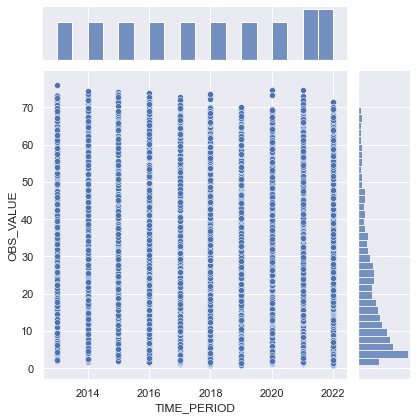

In [74]:
sns.jointplot(x='TIME_PERIOD', y='OBS_VALUE', data=df);

Text(0.5, 1.0, 'Observed Values Density')

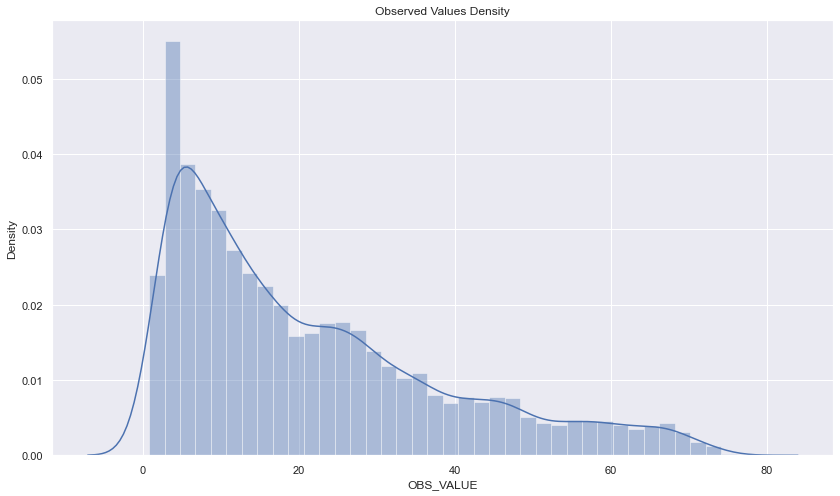

In [75]:
import seaborn as sns
sns.distplot(df["OBS_VALUE"]);
plt.title('Observed Values Density')

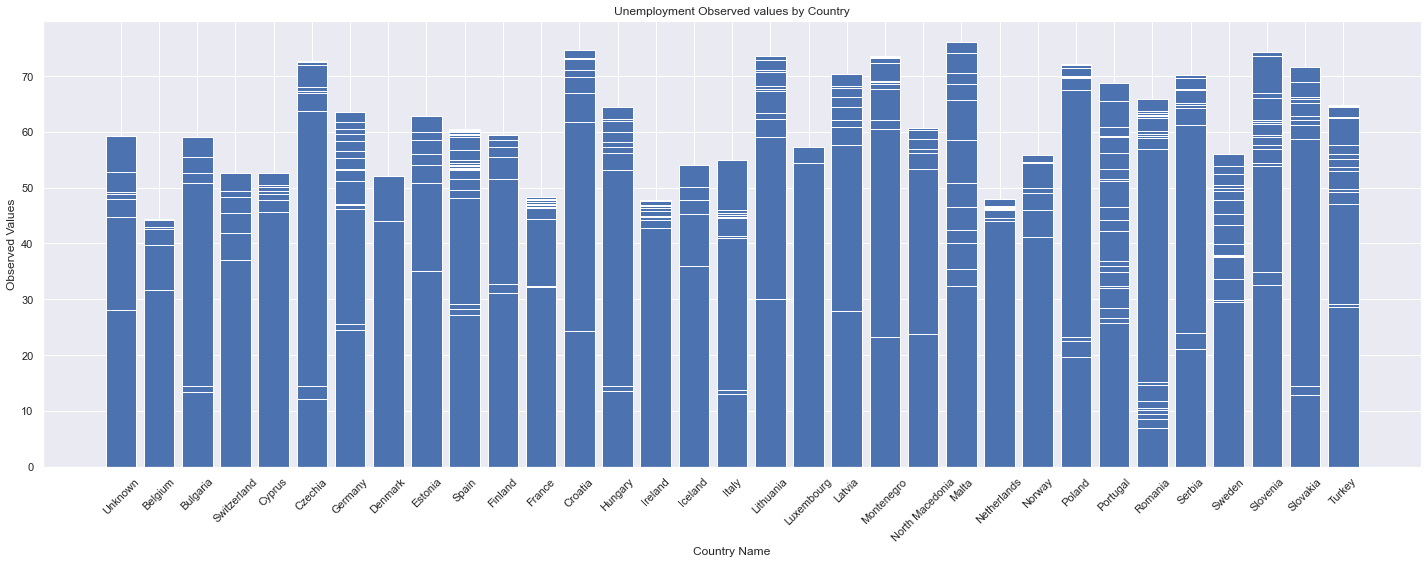

In [77]:
fig, b = plt.subplots(figsize=(20,8))
b = plt.bar(df['country_name'], df['OBS_VALUE'])
plt.title('Unemployment Observed values by Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Country Name')
plt.ylabel('Observed Values')
plt.tight_layout()

# Display the plot
plt.show()

In [78]:
df.head(2)

isced11     age  TIME_PERIOD  OBS_VALUE  age_encoded  isced11_encoded  \
0   ED0-2  Y15-74         2013        9.6            0                0   
1   ED0-2  Y15-74         2014       10.4            0                0   

   unit_PC_UNE  sex_M  sex_T  geo_BE  ...  geo_PT  geo_RO  geo_RS  geo_SE  \
0            0      0      0       0  ...       0       0       0       0   
1            0      0      0       0  ...       0       0       0       0   

   geo_SI  geo_SK  geo_TR   geo  country_name    geo_3  
0       0       0       0  None       Unknown  Unknown  
1       0       0       0  None       Unknown  Unknown  

[2 rows x 45 columns]

In [79]:
print(df.columns)

Index(['isced11', 'age', 'TIME_PERIOD', 'OBS_VALUE', 'age_encoded',
       'isced11_encoded', 'unit_PC_UNE', 'sex_M', 'sex_T', 'geo_BE', 'geo_BG',
       'geo_CH', 'geo_CY', 'geo_CZ', 'geo_DE', 'geo_DK', 'geo_EE', 'geo_EL',
       'geo_ES', 'geo_FI', 'geo_FR', 'geo_HR', 'geo_HU', 'geo_IE', 'geo_IS',
       'geo_IT', 'geo_LT', 'geo_LU', 'geo_LV', 'geo_ME', 'geo_MK', 'geo_MT',
       'geo_NL', 'geo_NO', 'geo_PL', 'geo_PT', 'geo_RO', 'geo_RS', 'geo_SE',
       'geo_SI', 'geo_SK', 'geo_TR', 'geo', 'country_name', 'geo_3'],
      dtype='object')


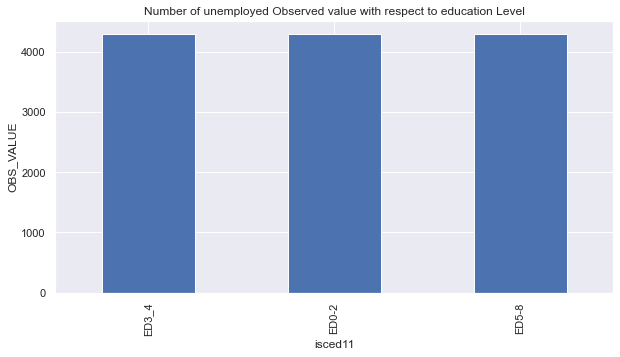

In [80]:
df.isced11.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.title("Number of unemployed Observed value with respect to education Level")
plt.ylabel("OBS_VALUE")
plt.xlabel("isced11");

## Subsetting Data

## Group by Education Level

In [81]:
df['isced11'] == 'ED0-2'

0         True
1         True
2         True
3         True
4         True
         ...  
13273    False
13274    False
13275    False
13276    False
13277    False
Name: isced11, Length: 12882, dtype: bool

In [82]:
df_preprimary = df[df['isced11'] == 'ED0-2']

In [83]:
df_preprimary.head(2)

isced11     age  TIME_PERIOD  OBS_VALUE  age_encoded  isced11_encoded  \
0   ED0-2  Y15-74         2013        9.6            0                0   
1   ED0-2  Y15-74         2014       10.4            0                0   

   unit_PC_UNE  sex_M  sex_T  geo_BE  ...  geo_PT  geo_RO  geo_RS  geo_SE  \
0            0      0      0       0  ...       0       0       0       0   
1            0      0      0       0  ...       0       0       0       0   

   geo_SI  geo_SK  geo_TR   geo  country_name    geo_3  
0       0       0       0  None       Unknown  Unknown  
1       0       0       0  None       Unknown  Unknown  

[2 rows x 45 columns]

In [84]:
df['isced11'] == 'ED3-4'

0        False
1        False
2        False
3        False
4        False
         ...  
13273    False
13274    False
13275    False
13276    False
13277    False
Name: isced11, Length: 12882, dtype: bool

In [85]:
df_PostPrimary = df[df['isced11'] == 'ED3-4']

In [86]:
df['isced11'] == 'ED5-8'

0        False
1        False
2        False
3        False
4        False
         ...  
13273     True
13274     True
13275     True
13276     True
13277     True
Name: isced11, Length: 12882, dtype: bool

In [87]:
df_doct = df[df['isced11'] == 'ED5-8']

In [88]:
df_doct.head()

isced11     age  TIME_PERIOD  OBS_VALUE  age_encoded  isced11_encoded  \
2950   ED5-8  Y15-74         2013        4.0            0                2   
2951   ED5-8  Y15-74         2014        4.0            0                2   
2952   ED5-8  Y15-74         2015        3.6            0                2   
2953   ED5-8  Y15-74         2016        3.2            0                2   
2954   ED5-8  Y15-74         2017        3.1            0                2   

      unit_PC_UNE  sex_M  sex_T  geo_BE  ...  geo_PT  geo_RO  geo_RS  geo_SE  \
2950            0      0      0       0  ...       0       0       0       0   
2951            0      0      0       0  ...       0       0       0       0   
2952            0      0      0       0  ...       0       0       0       0   
2953            0      0      0       0  ...       0       0       0       0   
2954            0      0      0       0  ...       0       0       0       0   

      geo_SI  geo_SK  geo_TR   geo  country_name    geo_3  
2950       0       0       0  None       Unknown  Unknown  
2951       0       0       0  None       Unknown  Unknown  
2952       0       0       0  None       Unknown  Unknown  
2953       0       0       0  None       Unknown  Unknown  
2954       0       0       0  None       Unknown  Unknown  

[5 rows x 45 columns]

In [89]:
df_educationlevel=df[['isced11', 'OBS_VALUE']].groupby('isced11').mean()
df_educationlevel

OBS_VALUE
isced11           
ED0-2    21.620831
ED3_4    28.343808
ED5-8    13.975221

In [90]:
df_educationlevel=df[['isced11', 'OBS_VALUE']].groupby('isced11').max()
df_educationlevel

OBS_VALUE
isced11           
ED0-2         76.1
ED3_4         74.6
ED5-8         57.3

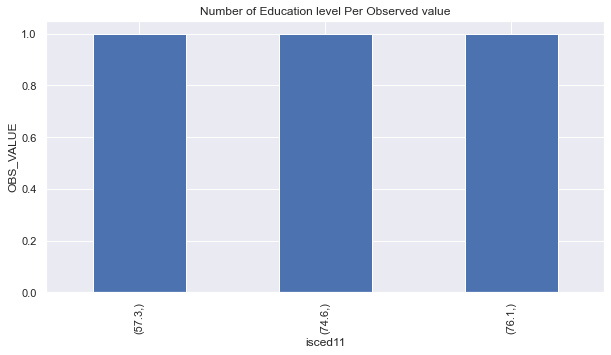

In [91]:
df_educationlevel.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.title("Number of Education level Per Observed value")
plt.ylabel("OBS_VALUE")
plt.xlabel("isced11");

In [92]:
df_edulevelTotal= df.groupby('isced11')['isced11'].agg('count')
df_edulevelTotal

isced11
ED0-2    4294
ED3_4    4296
ED5-8    4292
Name: isced11, dtype: int64

### Group By Gender

In [93]:
print(df_original['sex'].unique())

['F' 'M' 'T']


In [94]:
df_temp = df_original.copy()
df_temp = pd.get_dummies(df_temp, columns=['sex', 'geo', 'unit'], prefix=['sex', 'geo','unit'])
print(df_temp.columns)

Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'isced11', 'age', 'TIME_PERIOD',
       'OBS_VALUE', 'OBS_FLAG', 'sex_F', 'sex_M', 'sex_T', 'geo_AT', 'geo_BE',
       'geo_BG', 'geo_CH', 'geo_CY', 'geo_CZ', 'geo_DE', 'geo_DK', 'geo_EE',
       'geo_EL', 'geo_ES', 'geo_FI', 'geo_FR', 'geo_HR', 'geo_HU', 'geo_IE',
       'geo_IS', 'geo_IT', 'geo_LT', 'geo_LU', 'geo_LV', 'geo_ME', 'geo_MK',
       'geo_MT', 'geo_NL', 'geo_NO', 'geo_PL', 'geo_PT', 'geo_RO', 'geo_RS',
       'geo_SE', 'geo_SI', 'geo_SK', 'geo_TR', 'unit_PC_ACT', 'unit_PC_UNE'],
      dtype='object')


In [95]:
le_age = LabelEncoder()
le_isced11 = LabelEncoder()
df_temp['age_encoded'] = le_age.fit_transform(df_temp['age'])
df_temp['isced11_encoded'] = le_isced11.fit_transform(df_temp['isced11'])
print(df_temp.columns)


Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'isced11', 'age', 'TIME_PERIOD',
       'OBS_VALUE', 'OBS_FLAG', 'sex_F', 'sex_M', 'sex_T', 'geo_AT', 'geo_BE',
       'geo_BG', 'geo_CH', 'geo_CY', 'geo_CZ', 'geo_DE', 'geo_DK', 'geo_EE',
       'geo_EL', 'geo_ES', 'geo_FI', 'geo_FR', 'geo_HR', 'geo_HU', 'geo_IE',
       'geo_IS', 'geo_IT', 'geo_LT', 'geo_LU', 'geo_LV', 'geo_ME', 'geo_MK',
       'geo_MT', 'geo_NL', 'geo_NO', 'geo_PL', 'geo_PT', 'geo_RO', 'geo_RS',
       'geo_SE', 'geo_SI', 'geo_SK', 'geo_TR', 'unit_PC_ACT', 'unit_PC_UNE',
       'age_encoded', 'isced11_encoded'],
      dtype='object')


In [96]:
df=df_temp

In [97]:
df.head(2)

DATAFLOW        LAST UPDATE freq isced11     age  TIME_PERIOD  \
0  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74         2013   
1  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74         2014   

   OBS_VALUE OBS_FLAG  sex_F  sex_M  ...  geo_RO  geo_RS  geo_SE  geo_SI  \
0        9.6      NaN      1      0  ...       0       0       0       0   
1       10.4      NaN      1      0  ...       0       0       0       0   

   geo_SK  geo_TR  unit_PC_ACT  unit_PC_UNE  age_encoded  isced11_encoded  
0       0       0            1            0            0                0  
1       0       0            1            0            0                0  

[2 rows x 49 columns]

In [98]:
print(df['sex_F'].unique())


[1 0]


In [99]:
df['sex_F'] == 1

0         True
1         True
2         True
3         True
4         True
         ...  
13273    False
13274    False
13275    False
13276    False
13277    False
Name: sex_F, Length: 13278, dtype: bool

In [100]:
df_females = df[df['sex_F'] == 1]

In [101]:
df_females.head(5)

DATAFLOW        LAST UPDATE freq isced11     age  TIME_PERIOD  \
0  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74         2013   
1  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74         2014   
2  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74         2015   
3  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74         2016   
4  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74         2017   

   OBS_VALUE OBS_FLAG  sex_F  sex_M  ...  geo_RO  geo_RS  geo_SE  geo_SI  \
0        9.6      NaN      1      0  ...       0       0       0       0   
1       10.4      NaN      1      0  ...       0       0       0       0   
2       10.0      NaN      1      0  ...       0       0       0       0   
3       11.3      NaN      1      0  ...       0       0       0       0   
4       11.6      NaN      1      0  ...       0       0       0       0   

   geo_SK  geo_TR  unit_PC_ACT  unit_PC_UNE  age_encoded  isced11_encoded  
0       0       0            1            0            0                0  
1       0       0            1            0            0                0  
2       0       0            1            0            0                0  
3       0       0            1            0            0                0  
4       0       0            1            0            0                0  

[5 rows x 49 columns]

In [102]:
df_male = df[df['sex_M'] == 1]

In [103]:
df_male.head(5)

DATAFLOW        LAST UPDATE freq isced11     age  \
4426  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74   
4427  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74   
4428  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74   
4429  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74   
4430  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74   

      TIME_PERIOD  OBS_VALUE OBS_FLAG  sex_F  sex_M  ...  geo_RO  geo_RS  \
4426         2013       13.3      NaN      0      1  ...       0       0   
4427         2014       14.9      NaN      0      1  ...       0       0   
4428         2015       14.7      NaN      0      1  ...       0       0   
4429         2016       16.7      NaN      0      1  ...       0       0   
4430         2017       17.1      NaN      0      1  ...       0       0   

      geo_SE  geo_SI  geo_SK  geo_TR  unit_PC_ACT  unit_PC_UNE  age_encoded  \
4426       0       0       0       0            1            0            0   
4427       0       0       0       0            1            0            0   
4428       0       0       0       0            1            0            0   
4429       0       0       0       0            1            0            0   
4430       0       0       0       0            1            0            0   

      isced11_encoded  
4426                0  
4427                0  
4428                0  
4429                0  
4430                0  

[5 rows x 49 columns]

In [104]:
df['sex_T'] == 1

0        False
1        False
2        False
3        False
4        False
         ...  
13273     True
13274     True
13275     True
13276     True
13277     True
Name: sex_T, Length: 13278, dtype: bool

In [105]:
df_total = df[df['sex_T'] == 1]

In [106]:
df_total.head()

DATAFLOW        LAST UPDATE freq isced11     age  \
8850  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74   
8851  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74   
8852  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74   
8853  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74   
8854  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74   

      TIME_PERIOD  OBS_VALUE OBS_FLAG  sex_F  sex_M  ...  geo_RO  geo_RS  \
8850         2013       11.4      NaN      0      0  ...       0       0   
8851         2014       12.5      NaN      0      0  ...       0       0   
8852         2015       12.2      NaN      0      0  ...       0       0   
8853         2016       13.9      NaN      0      0  ...       0       0   
8854         2017       14.3      NaN      0      0  ...       0       0   

      geo_SE  geo_SI  geo_SK  geo_TR  unit_PC_ACT  unit_PC_UNE  age_encoded  \
8850       0       0       0       0            1            0            0   
8851       0       0       0       0            1            0            0   
8852       0       0       0       0            1            0            0   
8853       0       0       0       0            1            0            0   
8854       0       0       0       0            1            0            0   

      isced11_encoded  
8850                0  
8851                0  
8852                0  
8853                0  
8854                0  

[5 rows x 49 columns]

In [107]:
# Calculate the mean OBS_VALUE for each gender
mean_F = df[df['sex_F'] == 1]['OBS_VALUE'].mean()
mean_M = df[df['sex_M'] == 1]['OBS_VALUE'].mean()
mean_T = df[df['sex_T'] == 1]['OBS_VALUE'].mean()
df_sex = pd.DataFrame({
    'sex': ['F', 'M', 'T'],
    'OBS_VALUE': [mean_F, mean_M, mean_T]
})
print(df_sex)


  sex  OBS_VALUE
0   F  21.813667
1   M  21.271532
2   T  21.444670


In [108]:
# Calculate the maximum OBS_VALUE for each gender
max_F = df[df['sex_F'] == 1]['OBS_VALUE'].max()
max_M = df[df['sex_M'] == 1]['OBS_VALUE'].max()
max_T = df[df['sex_T'] == 1]['OBS_VALUE'].max()
df_sex_max = pd.DataFrame({
    'sex': ['F', 'M', 'T'],
    'OBS_VALUE_max': [max_F, max_M, max_T]
})

print(df_sex)


  sex  OBS_VALUE
0   F  21.813667
1   M  21.271532
2   T  21.444670


In [109]:
# Calculate the count for each gender
count_F = df['sex_F'].sum()
count_M = df['sex_M'].sum()
count_T = df['sex_T'].sum()
df_sextotal = pd.Series({
    'F': count_F,
    'M': count_M,
    'T': count_T
})

print(df_sextotal)


F    4426
M    4424
T    4428
dtype: int64


## Group by Age

In [110]:
df['age'].unique()

array(['Y15-74', 'Y20-64', 'Y25-74'], dtype=object)

In [111]:
df['age'] == 'Y15-74'

0         True
1         True
2         True
3         True
4         True
         ...  
13273    False
13274    False
13275    False
13276    False
13277    False
Name: age, Length: 13278, dtype: bool

In [112]:
df_youngest = df[df['age'] == 'Y15-74']

In [113]:
df_youngest.head(2)

DATAFLOW        LAST UPDATE freq isced11     age  TIME_PERIOD  \
0  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74         2013   
1  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74         2014   

   OBS_VALUE OBS_FLAG  sex_F  sex_M  ...  geo_RO  geo_RS  geo_SE  geo_SI  \
0        9.6      NaN      1      0  ...       0       0       0       0   
1       10.4      NaN      1      0  ...       0       0       0       0   

   geo_SK  geo_TR  unit_PC_ACT  unit_PC_UNE  age_encoded  isced11_encoded  
0       0       0            1            0            0                0  
1       0       0            1            0            0                0  

[2 rows x 49 columns]

In [114]:
df_aget = df[['age', 'OBS_VALUE']].groupby('age').max()
df_aget

OBS_VALUE
age              
Y15-74       74.6
Y20-64       76.1
Y25-74       69.6

In [115]:
df_aget = df[['age', 'OBS_VALUE']].groupby('age').mean()
df_aget

OBS_VALUE
age              
Y15-74  21.724317
Y20-64  21.612408
Y25-74  19.990495

In [116]:
df_agetotal=df.groupby('age')['age'].agg('count')

In [117]:
df_agetotal

age
Y15-74    6010
Y20-64    6010
Y25-74    1258
Name: age, dtype: int64

# Groupby Country

In [118]:
df_geo_mean = df.filter(like='geo_').multiply(df['OBS_VALUE'], axis=0).sum().div(df.filter(like='geo_').sum())


In [119]:
df_geo_mean = df_geo_mean.reset_index().rename(columns={'index': 'geo', 0: 'mean_OBS_VALUE'})
print(df_geo_mean)

       geo  mean_OBS_VALUE
0   geo_AT       20.247222
1   geo_BE       21.043182
2   geo_BG       22.010859
3   geo_CH       19.369192
4   geo_CY       22.076768
5   geo_CZ       20.103030
6   geo_DE       18.951010
7   geo_DK       19.106566
8   geo_EE       20.487817
9   geo_EL       27.126263
10  geo_ES       25.650253
11  geo_FI       21.141162
12  geo_FR       21.577273
13  geo_HR       22.307323
14  geo_HU       19.952778
15  geo_IE       20.384091
16  geo_IS       18.576515
17  geo_IT       21.737121
18  geo_LT       22.745960
19  geo_LU       18.606818
20  geo_LV       21.918687
21  geo_ME       26.482292
22  geo_MK       28.134028
23  geo_MT       18.674235
24  geo_NL       19.222475
25  geo_NO       19.009091
26  geo_PL       20.303030
27  geo_PT       21.248990
28  geo_RO       20.018333
29  geo_RS       23.880556
30  geo_SE       21.829798
31  geo_SI       21.206818
32  geo_SK       26.093939
33  geo_TR       22.694444


In [120]:
# Select Post graduate education Level for the Ireland as it is the maximum number
hist_educ = 'ED3_4'
hist_country = 'IE'

mask1 = df['isced11'].str.contains(hist_educ) 
mask2 = df['geo_IE'] == 1

org = df[mask1 & mask2]


In [121]:
org.head()

DATAFLOW        LAST UPDATE freq isced11     age  \
1624  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   
1625  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   
1626  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   
1627  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   
1628  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   

      TIME_PERIOD  OBS_VALUE OBS_FLAG  sex_F  sex_M  ...  geo_RO  geo_RS  \
1624         2013       16.5      NaN      1      0  ...       0       0   
1625         2014       14.1      NaN      1      0  ...       0       0   
1626         2015       11.7      NaN      1      0  ...       0       0   
1627         2016       10.0      NaN      1      0  ...       0       0   
1628         2017        8.4      NaN      1      0  ...       0       0   

      geo_SE  geo_SI  geo_SK  geo_TR  unit_PC_ACT  unit_PC_UNE  age_encoded  \
1624       0       0       0       0            1            0            0   
1625       0       0       0       0            1            0            0   
1626       0       0       0       0            1            0            0   
1627       0       0       0       0            1            0            0   
1628       0       0       0       0            1            0            0   

      isced11_encoded  
1624                1  
1625                1  
1626                1  
1627                1  
1628                1  

[5 rows x 49 columns]

### Let's see how age of ED3_4 for the Ireland have changed over time using MatplotLib

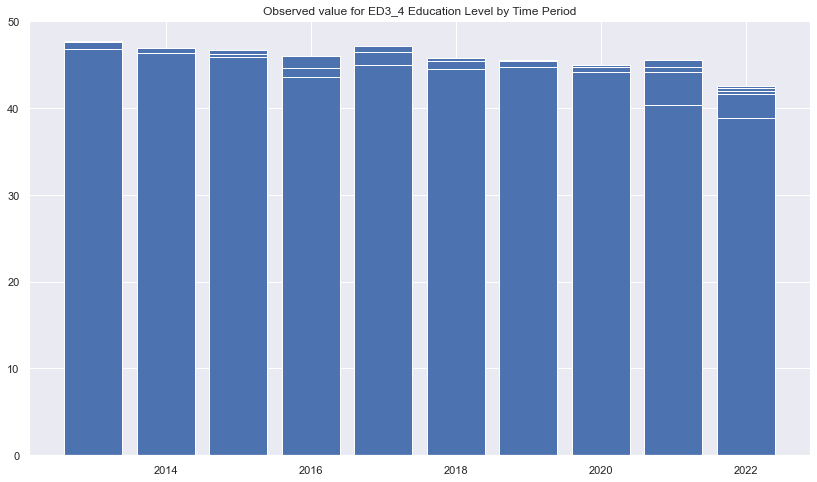

In [122]:
# get the years
years = org['TIME_PERIOD'].values
# get the values 
education = org['OBS_VALUE'].values

# create
plt.bar(years,education)
plt.title('Observed value for ED3_4 Education Level by Time Period')
plt.show();

### But how do unemployment rate relate to those of other countries in 2021?

In [123]:
# select ED3_4 unemployment rate for all countries in 2021 
hist_educ = 'ED3_4'
hist_year = 2021

mask1 = df['isced11'].str.contains(hist_educ) 
mask2 = df['TIME_PERIOD'].isin([hist_year])

# apply our mask
unempl_2021 = df[mask1 & mask2]
unempl_2021.head()

DATAFLOW        LAST UPDATE freq isced11     age  \
1482  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   
1492  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   
1502  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   
1512  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   
1522  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   

      TIME_PERIOD  OBS_VALUE OBS_FLAG  sex_F  sex_M  ...  geo_RO  geo_RS  \
1482         2021        6.0      NaN      1      0  ...       0       0   
1492         2021        7.2      NaN      1      0  ...       0       0   
1502         2021        4.9      NaN      1      0  ...       0       0   
1512         2021        5.1      NaN      1      0  ...       0       0   
1522         2021        9.1      NaN      1      0  ...       0       0   

      geo_SE  geo_SI  geo_SK  geo_TR  unit_PC_ACT  unit_PC_UNE  age_encoded  \
1482       0       0       0       0            1            0            0   
1492       0       0       0       0            1            0            0   
1502       0       0       0       0            1            0            0   
1512       0       0       0       0            1            0            0   
1522       0       0       0       0            1            0            0   

      isced11_encoded  
1482                1  
1492                1  
1502                1  
1512                1  
1522                1  

[5 rows x 49 columns]

In [124]:
print(len(unempl_2021))

558


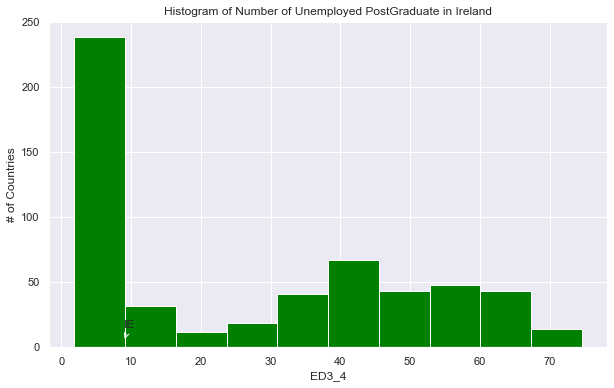

In [125]:
# let's plot a histogram of the Number of unemployed post grad by country
# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots(figsize=(10,6))

ax.annotate("IE",
            xy=(9, 5), xycoords='data',
            xytext=(9, 15), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(unempl_2021['OBS_VALUE'], 10, density=False, facecolor='green')

plt.xlabel(org['isced11'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of Number of Unemployed PostGraduate in Ireland')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

In [126]:
print("Unemployed Post graduate Min Year = ", org['TIME_PERIOD'].min(), "max: ", org['TIME_PERIOD'].max())

Unemployed Post graduate Min Year =  2013 max:  2022


In [127]:
# select Post graduate education Level for the Malta as it is the maximum number
hist_educ = 'ED3_4'
hist_country = 'MT'

mask1 = df['isced11'].str.contains(hist_educ) 
mask2 = df['geo_MT'] == 1

malta_org = df[mask1 & mask2]

In [128]:
malta_org.head()

DATAFLOW        LAST UPDATE freq isced11     age  \
1700  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   
1701  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   
1702  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   
1703  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   
1704  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   

      TIME_PERIOD  OBS_VALUE OBS_FLAG  sex_F  sex_M  ...  geo_RO  geo_RS  \
1700         2013        4.5      NaN      1      0  ...       0       0   
1701         2014        3.3      NaN      1      0  ...       0       0   
1702         2015        3.4      NaN      1      0  ...       0       0   
1703         2016        3.8      NaN      1      0  ...       0       0   
1704         2017        3.4      NaN      1      0  ...       0       0   

      geo_SE  geo_SI  geo_SK  geo_TR  unit_PC_ACT  unit_PC_UNE  age_encoded  \
1700       0       0       0       0            1            0            0   
1701       0       0       0       0            1            0            0   
1702       0       0       0       0            1            0            0   
1703       0       0       0       0            1            0            0   
1704       0       0       0       0            1            0            0   

      isced11_encoded  
1700                1  
1701                1  
1702                1  
1703                1  
1704                1  

[5 rows x 49 columns]

In [129]:
# select ED3_4 unemployment rate for all countries in 2021 
hist_educ = 'ED3_4'
hist_year = 2021

mask1 = df['isced11'].str.contains(hist_educ) 
mask2 = df['TIME_PERIOD'].isin([hist_year])

# apply our mask
unemplM_2021 = df[mask1 & mask2]
unemplM_2021.head()

DATAFLOW        LAST UPDATE freq isced11     age  \
1482  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   
1492  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   
1502  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   
1512  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   
1522  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED3_4  Y15-74   

      TIME_PERIOD  OBS_VALUE OBS_FLAG  sex_F  sex_M  ...  geo_RO  geo_RS  \
1482         2021        6.0      NaN      1      0  ...       0       0   
1492         2021        7.2      NaN      1      0  ...       0       0   
1502         2021        4.9      NaN      1      0  ...       0       0   
1512         2021        5.1      NaN      1      0  ...       0       0   
1522         2021        9.1      NaN      1      0  ...       0       0   

      geo_SE  geo_SI  geo_SK  geo_TR  unit_PC_ACT  unit_PC_UNE  age_encoded  \
1482       0       0       0       0            1            0            0   
1492       0       0       0       0            1            0            0   
1502       0       0       0       0            1            0            0   
1512       0       0       0       0            1            0            0   
1522       0       0       0       0            1            0            0   

      isced11_encoded  
1482                1  
1492                1  
1502                1  
1512                1  
1522                1  

[5 rows x 49 columns]

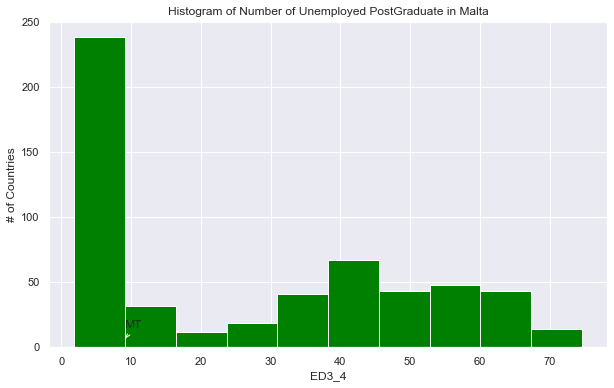

In [130]:
# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots(figsize=(10,6))

ax.annotate("MT",
            xy=(9, 5), xycoords='data',
            xytext=(9, 15), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(unemplM_2021['OBS_VALUE'], 10, density=False, facecolor='green')

plt.xlabel(org['isced11'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of Number of Unemployed PostGraduate in Malta')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

# Time Series Analysis

In [131]:
df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'], format='%Y')


In [132]:
df.set_index('TIME_PERIOD', inplace=True)

In [133]:
aggregated_df = df.groupby(df.index).mean()

In [134]:
import matplotlib.pyplot as plt

def plot_df(df, x=None, y=None, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    if x is not None and y is not None:
        plt.plot(x, y, color='tab:red')
    else:
        plt.plot(df, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


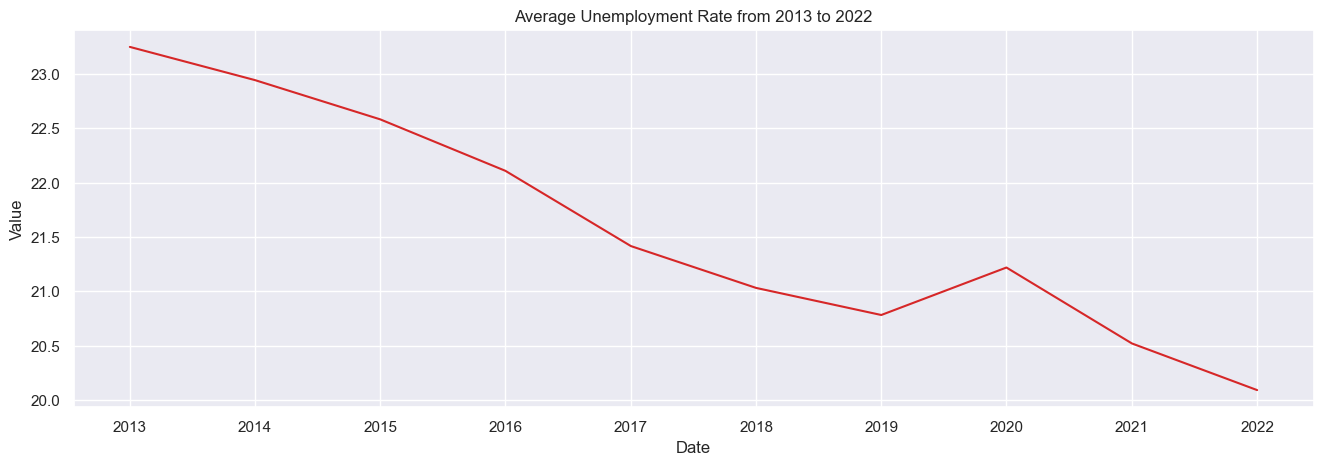

In [135]:
plot_df(aggregated_df, x=aggregated_df.index, y=aggregated_df['OBS_VALUE'], title='Average Unemployment Rate from 2013 to 2022')


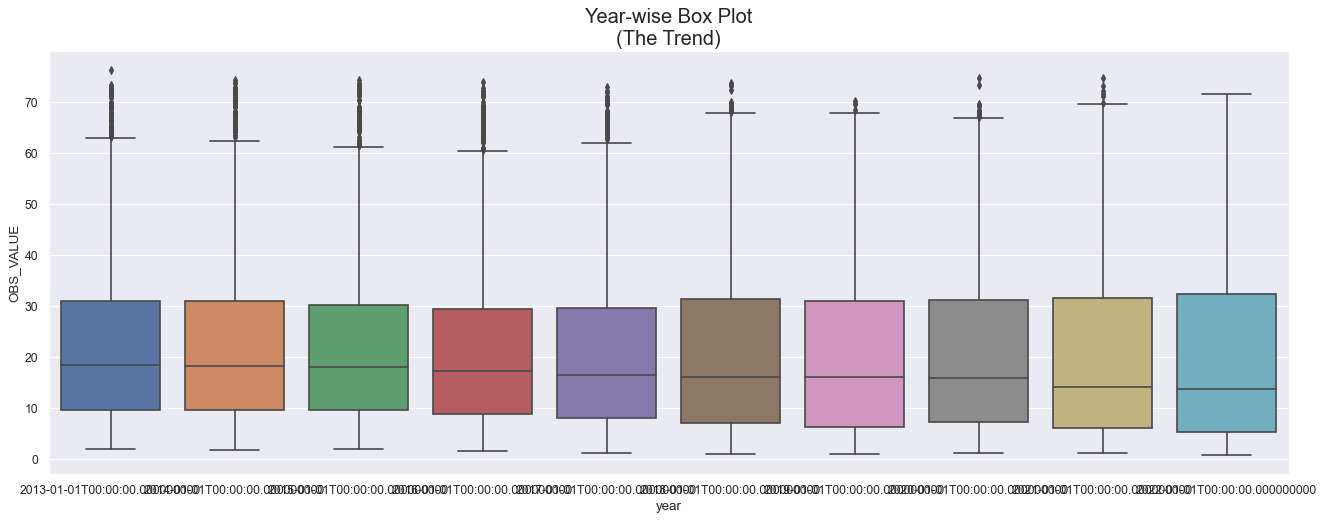

In [136]:
df.reset_index(inplace=True)

# Prepare data
df['year'] = df['TIME_PERIOD'] 

years = df['year'].unique()

# Draw Plot
fig, ax = plt.subplots(1, 1, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='OBS_VALUE', data=df, ax=ax)

# Set Title
ax.set_title('Year-wise Box Plot\n(The Trend)', fontsize=18)

plt.show()


In [137]:
df.head(2)

TIME_PERIOD               DATAFLOW        LAST UPDATE freq isced11     age  \
0  2013-01-01  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74   
1  2014-01-01  ESTAT:UNE_EDUC_A(1.0)  20/06/23 23:00:00    A   ED0-2  Y15-74   

   OBS_VALUE OBS_FLAG  sex_F  sex_M  ...  geo_RS  geo_SE  geo_SI  geo_SK  \
0        9.6      NaN      1      0  ...       0       0       0       0   
1       10.4      NaN      1      0  ...       0       0       0       0   

   geo_TR  unit_PC_ACT  unit_PC_UNE  age_encoded  isced11_encoded       year  
0       0            1            0            0                0 2013-01-01  
1       0            1            0            0                0 2014-01-01  

[2 rows x 50 columns]

In [138]:
df = df.drop(['OBS_FLAG','freq','LAST UPDATE', 'DATAFLOW'], axis =1)
df.head(5)

TIME_PERIOD isced11     age  OBS_VALUE  sex_F  sex_M  sex_T  geo_AT  geo_BE  \
0  2013-01-01   ED0-2  Y15-74        9.6      1      0      0       1       0   
1  2014-01-01   ED0-2  Y15-74       10.4      1      0      0       1       0   
2  2015-01-01   ED0-2  Y15-74       10.0      1      0      0       1       0   
3  2016-01-01   ED0-2  Y15-74       11.3      1      0      0       1       0   
4  2017-01-01   ED0-2  Y15-74       11.6      1      0      0       1       0   

   geo_BG  ...  geo_RS  geo_SE  geo_SI  geo_SK  geo_TR  unit_PC_ACT  \
0       0  ...       0       0       0       0       0            1   
1       0  ...       0       0       0       0       0            1   
2       0  ...       0       0       0       0       0            1   
3       0  ...       0       0       0       0       0            1   
4       0  ...       0       0       0       0       0            1   

   unit_PC_UNE  age_encoded  isced11_encoded       year  
0            0            0                0 2013-01-01  
1            0            0                0 2014-01-01  
2            0            0                0 2015-01-01  
3            0            0                0 2016-01-01  
4            0            0                0 2017-01-01  

[5 rows x 46 columns]

In [139]:
df['OBS_VALUE'].interpolate(method='linear', inplace=True)

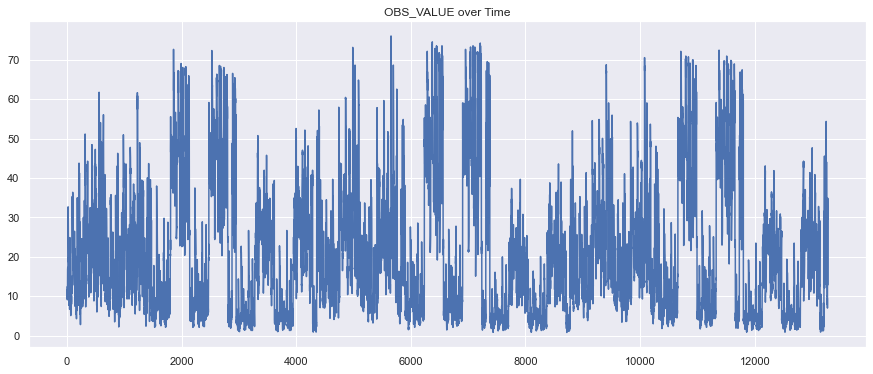

In [140]:
plt.figure(figsize=(15,6))
plt.plot(df['OBS_VALUE'])
plt.title('OBS_VALUE over Time')
plt.show()


## ACF plot and PACF plot

<Figure size 1080x432 with 0 Axes>

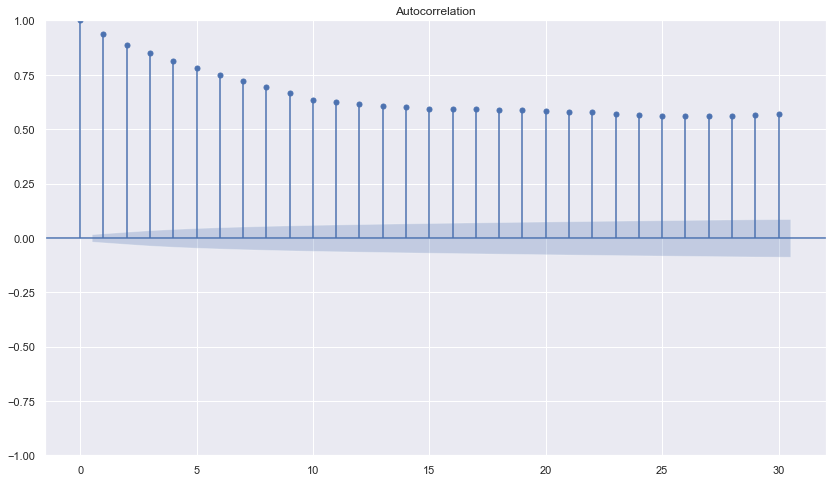

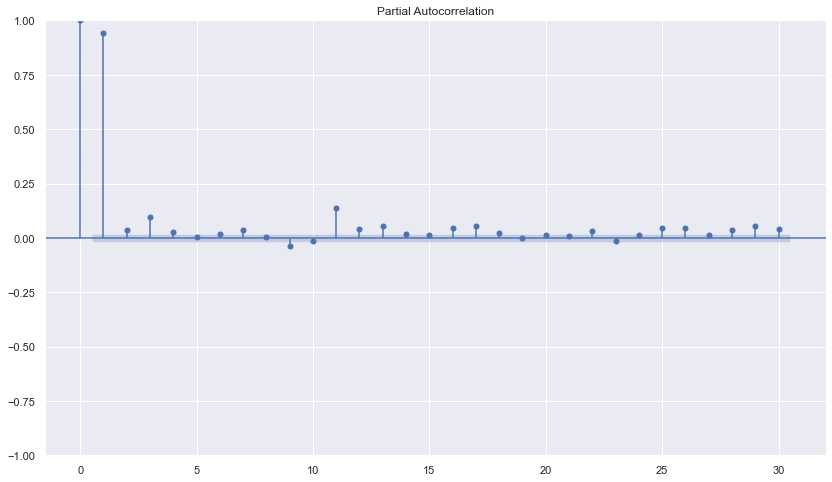

In [141]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15,6))
plot_acf(df['OBS_VALUE'], lags=30)
plot_pacf(df['OBS_VALUE'], lags=30)
plt.show()


<AxesSubplot:xlabel='TIME_PERIOD', ylabel='OBS_VALUE'>

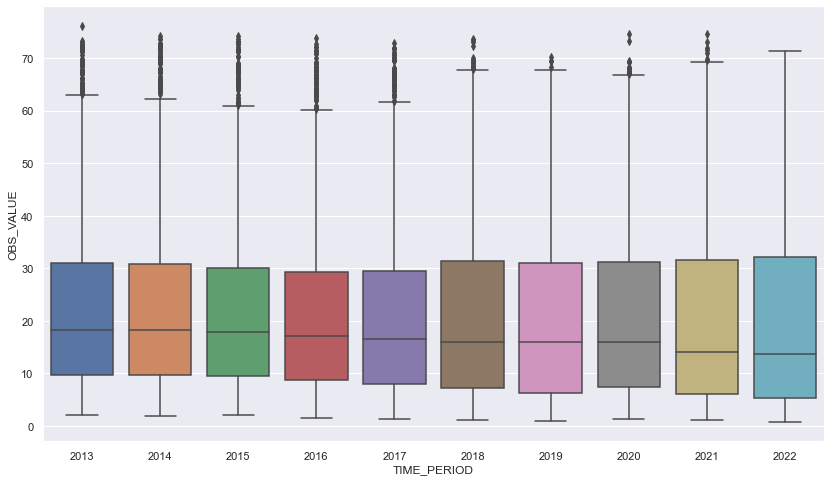

In [142]:
sns.boxplot(df['TIME_PERIOD'].dt.year, df['OBS_VALUE'])


Text(0, 0.5, 'Frequency')

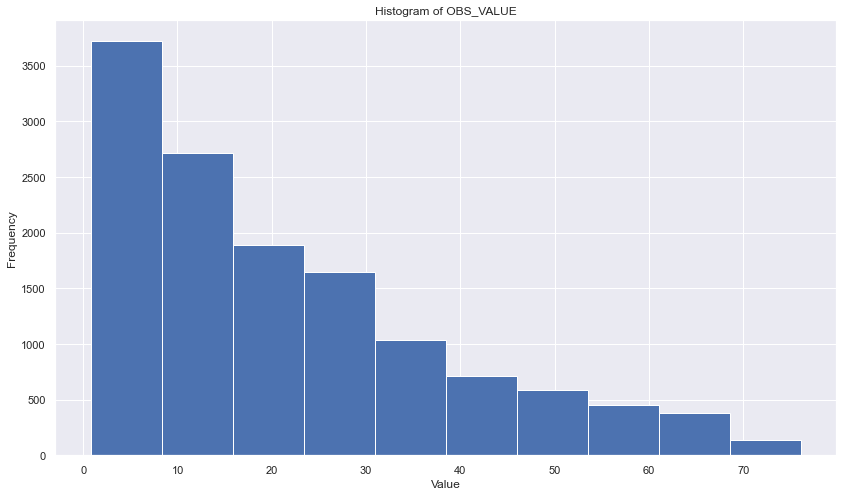

In [143]:
df['OBS_VALUE'].hist()
plt.title('Histogram of OBS_VALUE')
plt.xlabel('Value')
plt.ylabel('Frequency')


# Rolling Statistics

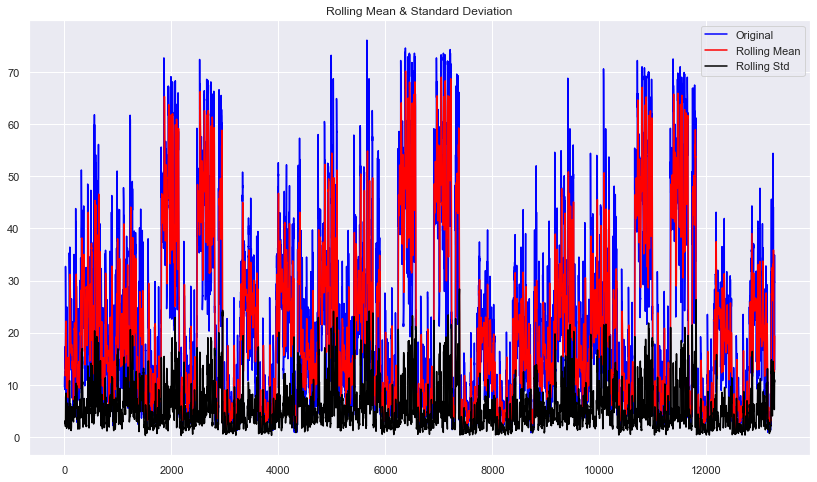

In [144]:
rolmean = df['OBS_VALUE'].rolling(window=12).mean()  # rolling mean
rolstd = df['OBS_VALUE'].rolling(window=12).std()   # rolling standard deviation

plt.plot(df['OBS_VALUE'], color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()


# Statistical Tests:

### Augmented Dickey-Fuller (ADF) Test:

In [145]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['OBS_VALUE'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
if result[1] <= 0.05:
    print("The series is stationary")
else:
    print("The series is not stationary")

ADF Statistic: -8.307189258694228
p-value: 3.8751384870385593e-13
Critical Values: {'1%': -3.4308441126059868, '5%': -2.8617583742607473, '10%': -2.566886235718683}
The series is stationary


The p-value for the Augmented Dickey-Fuller (ADF) Test is 1.884820101705396e-12, which is significantly less than 0.05. This suggests that the ADF test's null hypothesis, which contends that the time series is non-stationary, can be disproved. The test therefore indicates that the series is stationary.

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:

In [146]:
from statsmodels.tsa.stattools import kpss

result = kpss(df['OBS_VALUE'])

print('KPSS Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[3])

if result[1] <= 0.05:
    print("The series is not stationary")
else:
    print("The series is stationary")


KPSS Statistic: 0.12597674246652046
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is stationary


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




Our tests agree that data is already stationary so we do not need to induce stationarity that happens in case of non stationarity.The Dickey-Fuller and KPSS tests' findings demonstrate that the series is stationary. It follows that the series lacks a unit root and that its statistical characteristics, including mean, variance, and autocorrelation, remain constant across time.


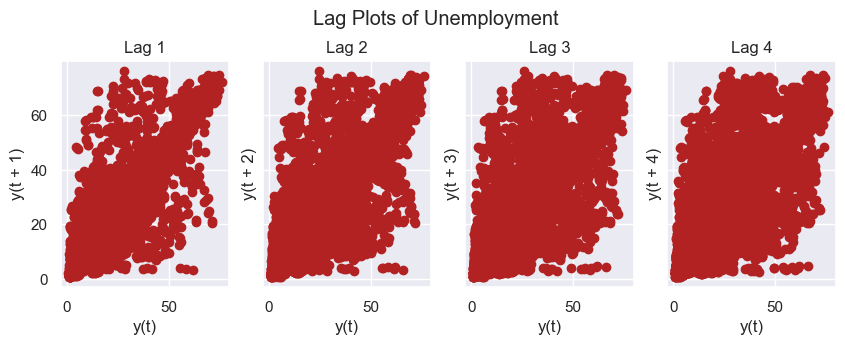

In [147]:
from pandas.plotting import lag_plot

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['OBS_VALUE'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Unemployment', y=1.05)    
plt.show()


The Lag Plot:

To determine if a data set or time series is random, lag graphs are utilized. In the case of (yt,y t+p), where y is detected at a point t and p is the lag, spots are drawn.
The lag plots for the earliest delays assist visualize the time series' correlation pattern. The type of time series model that might be appropriate can be determined by the structure or pattern.


In [148]:
df['Transformedlog_OBS_VALUE']= np.log(df['OBS_VALUE'])

In [149]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Transformedlog_OBS_VALUE'], order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Transformedlog_OBS_VALUE   No. Observations:                13278
Model:                       ARIMA(1, 0, 0)   Log Likelihood               -3502.353
Date:                      Thu, 21 Sep 2023   AIC                           7010.706
Time:                              17:53:02   BIC                           7033.188
Sample:                                   0   HQIC                          7018.210
                                    - 13278                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6891      0.052     51.511      0.000       2.587       2.791
ar.L1          0.9425      0.003    286.852      0.000       0.936       0.949
sigm

In [151]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# 1. Split data into training and testing datasets
train_size = int(len(df) * 0.8)  # For example, using 80% of the data for training
train, test = df['Transformedlog_OBS_VALUE'][:train_size], df['Transformedlog_OBS_VALUE'][train_size:]

# 2. Fit the model to the training set
model = ARIMA(train, order=(1,0,0))
model_fit = model.fit()

# 3. Generate predictions on the test set
forecast = model_fit.forecast(steps=len(test))

# 4. Calculate the RMSE
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


RMSE: 1.071396448910745


In [152]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Transformedlog_OBS_VALUE'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Transformedlog_OBS_VALUE   No. Observations:                13278
Model:                       ARIMA(1, 1, 1)   Log Likelihood               -3411.333
Date:                      Thu, 21 Sep 2023   AIC                           6828.666
Time:                              17:55:41   BIC                           6851.147
Sample:                                   0   HQIC                          6836.170
                                    - 13278                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8396      0.010     87.989      0.000       0.821       0.858
ma.L1         -0.9531      0.005   -196.469      0.000      -0.963      -0.944
sigm

In [153]:
# 1. Split data into training and testing datasets
train_size = int(len(df) * 0.8)  # For example, using 80% of the data for training
train, test = df['Transformedlog_OBS_VALUE'][:train_size], df['Transformedlog_OBS_VALUE'][train_size:]

# 2. Fit the model to the training set
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# 3. Generate predictions on the test set
forecast = model_fit.forecast(steps=len(test))

# 4. Calculate the RMSE
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


RMSE: 1.1623499068954521


In [154]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Transformedlog_OBS_VALUE'], order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Transformedlog_OBS_VALUE   No. Observations:                13278
Model:                       ARIMA(1, 0, 1)   Log Likelihood               -3464.812
Date:                      Tue, 19 Sep 2023   AIC                           6937.624
Time:                              08:18:25   BIC                           6967.599
Sample:                                   0   HQIC                          6947.629
                                    - 13278                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6879      0.057     46.773      0.000       2.575       2.801
ar.L1          0.9520      0.003    274.159      0.000       0.945       0.959
ma.L

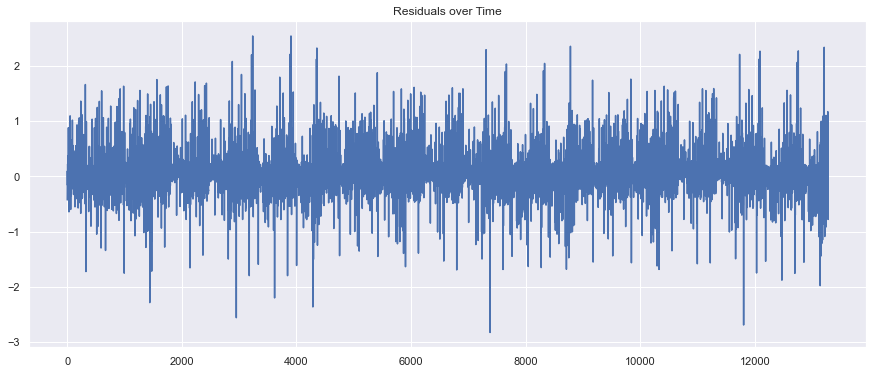

In [155]:
residuals = model_fit.resid
residuals.plot(figsize=(15, 6))
plt.title('Residuals over Time')
plt.show()

<Figure size 1080x432 with 0 Axes>

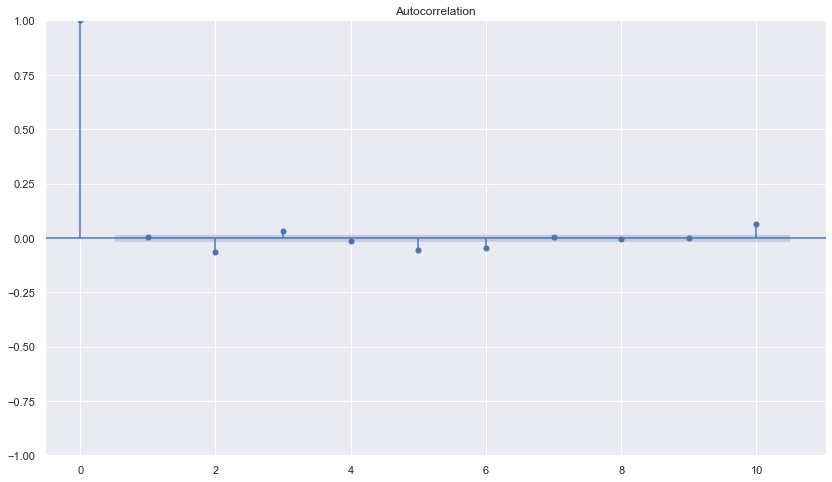

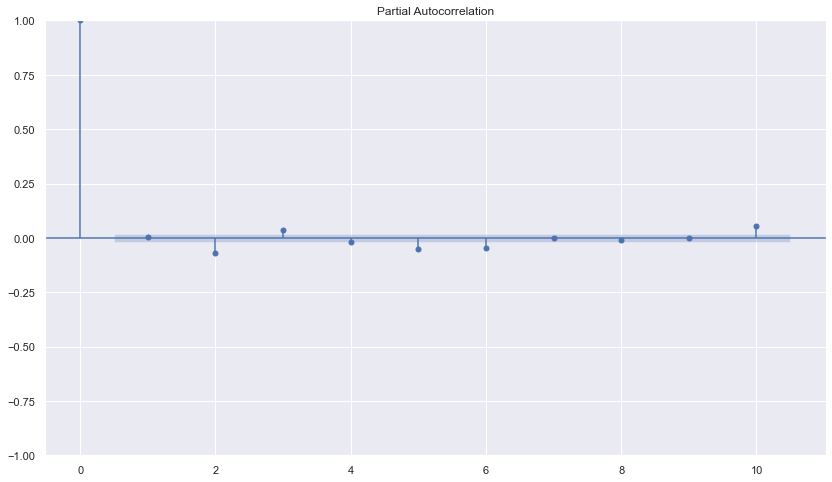

In [156]:
plt.figure(figsize=(15,6))
plot_acf(residuals, lags=10)
plot_pacf(residuals, lags=10)
plt.show()


In [157]:
train_size = int(len(df) * 0.8) # Taking 80% of the data for training
train, test = df['Transformedlog_OBS_VALUE'][:train_size], df['Transformedlog_OBS_VALUE'][train_size:]


In [158]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1,0,1))
model_fit = model.fit()

In [159]:
forecast = model_fit.forecast(steps=len(test))


In [160]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 1.147564883177479
Root Mean Squared Error (RMSE): 1.071244548727077
Mean Absolute Error (MAE): 0.9268614842523135


## Approximate Entropy
A statistical tool for assessing the degree of regularity and predictability in time series data is approximate entropy. While a greater value denotes more predictability, a lower value of approximate entropy indicates more regularity (making the series possibly easier to anticipate).


In [161]:
def ApEn(U, m, r):
    """Compute Approximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

# Compute the Approximate Entropy for yo
entropy_value = ApEn(df['Transformedlog_OBS_VALUE'].values, m=2, r=0.2*np.std(df['Transformedlog_OBS_VALUE'].values))

print(f"Approximate Entropy for Transformedlog_OBS_VALUE: {entropy_value}")


Approximate Entropy for Transformedlog_OBS_VALUE: 0.8432625286737858


# Sample Entropy
Similar to approximation entropy, sample entropy is typically thought to be more trustworthy, especially for smaller datasets. It similarly assesses a time series' complexity or unpredictability, but it is less susceptible to the time series' duration than approximation entropy is.


In [162]:
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

# Compute the Sample Entropy 
samp_entropy_value = SampEn(df['Transformedlog_OBS_VALUE'].values, m=2, r=0.2*np.std(df['Transformedlog_OBS_VALUE'].values))

print(f"Sample Entropy for Transformedlog_OBS_VALUE: {samp_entropy_value}")


Sample Entropy for Transformedlog_OBS_VALUE: 0.582813821393998


# Auto-Arima

In [163]:
from pmdarima import auto_arima

# Split data into training and testing datasets
train = df['Transformedlog_OBS_VALUE'][:-2]  # leaving last two years for testing
test = df['Transformedlog_OBS_VALUE'][-2:]

model = auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(test))


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6829.018, Time=19.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7388.344, Time=3.72 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7267.625, Time=1.59 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7238.852, Time=2.99 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7386.345, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6817.186, Time=30.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7119.887, Time=4.93 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6825.608, Time=16.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6798.169, Time=33.90 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=7121.544, Time=6.99 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6782.226, Time=49.47 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=63.16 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=6757.502, Time=49.84 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=6748.624, Time=43.71 sec
 ARIMA(0,1,4)(0,0,0)[0] interc

In [164]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(train, order=(4,1,5))
fit_arima = model_arima.fit()


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [165]:
forecast_arima = fit_arima.forecast(steps=len(test))


In [166]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, forecast_arima)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


RMSE: 0.756457298710973


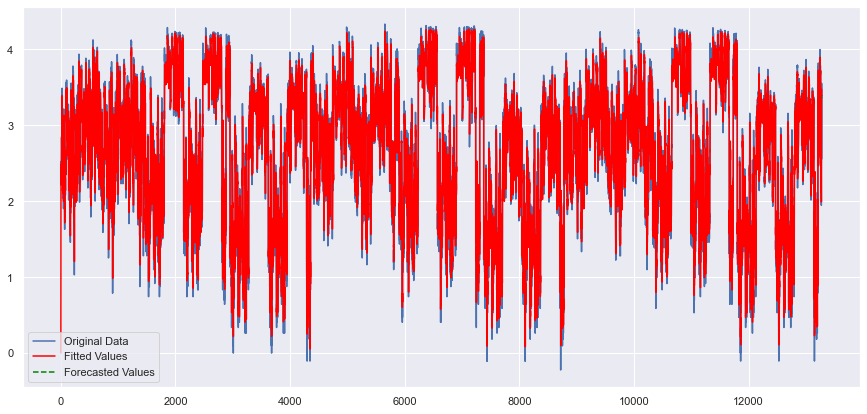

In [167]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(df['Transformedlog_OBS_VALUE'], label='Original Data')
plt.plot(np.arange(len(train)), fit_arima.fittedvalues, color='red', label='Fitted Values')
plt.plot(np.arange(len(train), len(train) + len(test)), forecast_arima, color='green', linestyle='--', label='Forecasted Values')
plt.legend()
plt.show()


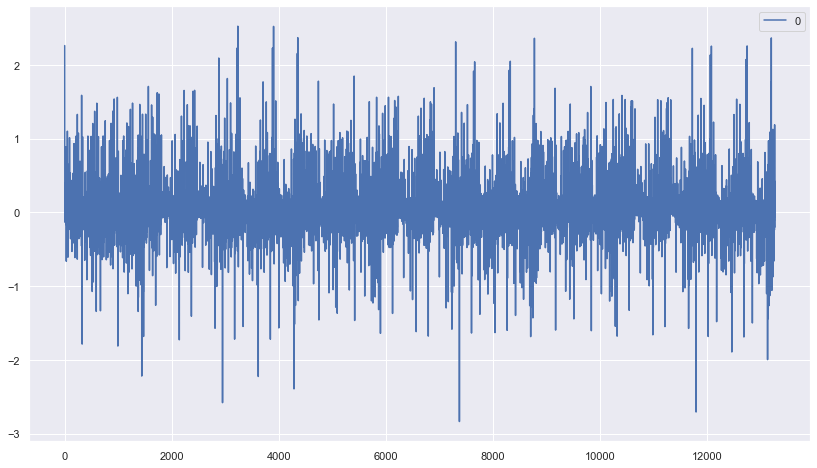

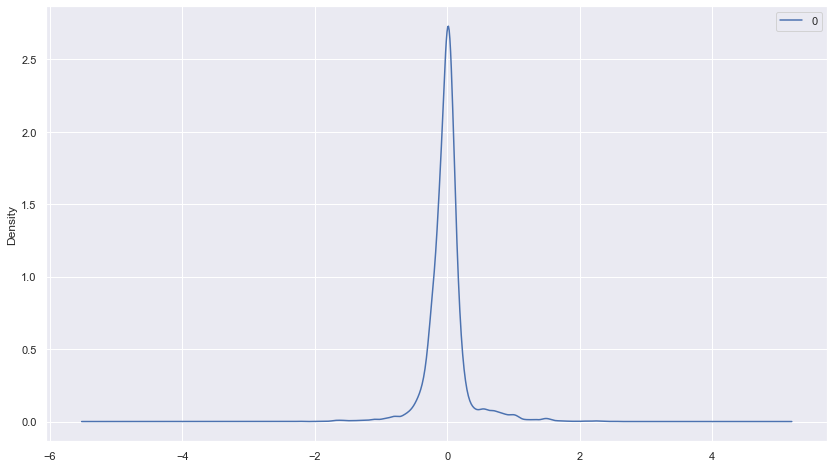

                  0
count  13276.000000
mean       0.000338
std        0.310343
min       -2.837244
25%       -0.116233
50%       -0.001334
75%        0.085223
max        2.524702


In [168]:
residuals = pd.DataFrame(fit_arima.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()

print(residuals.describe())


# Exponential Smoothing

In [169]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Splitting the data. Will keep 2 years (2019, 2020) for testing.
train = df['Transformedlog_OBS_VALUE'][:-2]
test = df['Transformedlog_OBS_VALUE'][-2:]

model = ExponentialSmoothing(train, trend='add', seasonal=None)
fit = model.fit()
forecast = fit.forecast(steps=2)  # Forecasting for the next 2 years (2021, 2022)


In [170]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


RMSE: 0.8796557574269267


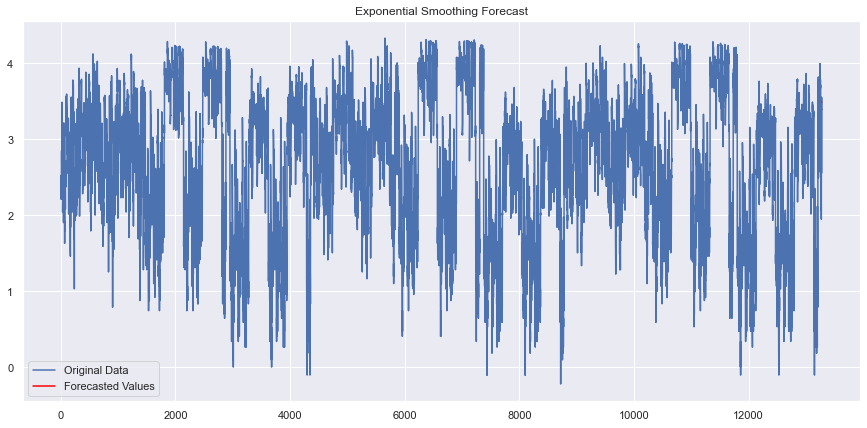

In [171]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(df['Transformedlog_OBS_VALUE'], label='Original Data')
plt.plot(np.arange(len(train), len(train) + len(test)), forecast, color='red', label='Forecasted Values')
plt.legend()
plt.title("Exponential Smoothing Forecast")
plt.show()


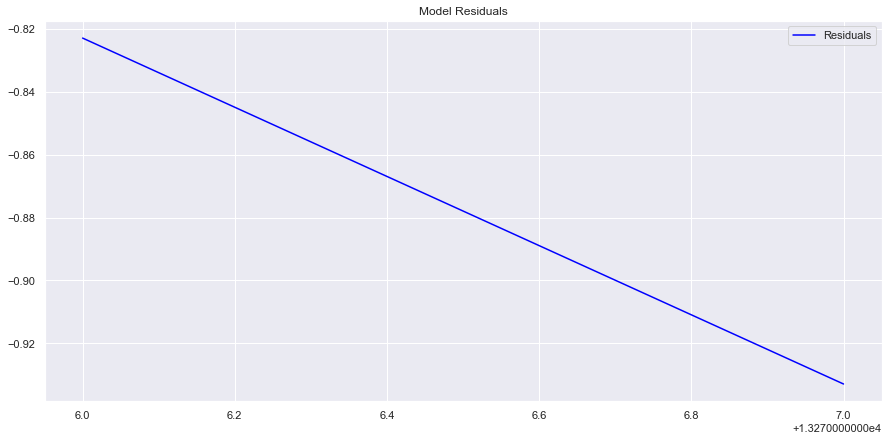

In [172]:
residuals = test - forecast
plt.figure(figsize=(15,7))
plt.plot(residuals, color='blue', label='Residuals')
plt.legend()
plt.title("Model Residuals")
plt.show()


In [173]:
print(fit.summary())


                         ExponentialSmoothing Model Results                         
Dep. Variable:     Transformedlog_OBS_VALUE   No. Observations:                13276
Model:                 ExponentialSmoothing   SSE                           1340.244
Optimized:                             True   AIC                         -30435.273
Trend:                             Additive   BIC                         -30405.298
Seasonal:                              None   AICC                        -30435.267
Seasonal Periods:                      None   Date:                 Tue, 19 Sep 2023
Box-Cox:                              False   Time:                         09:50:27
Box-Cox Coeff.:                        None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8819205                alpha                 Tru

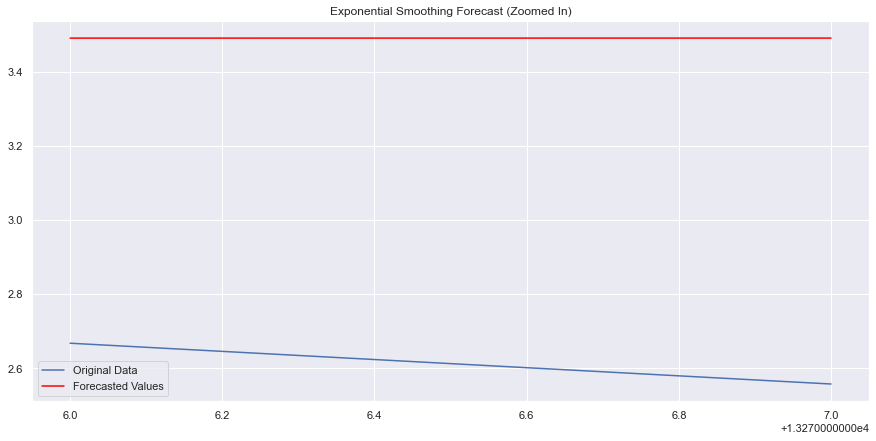

In [174]:
plt.figure(figsize=(15,7))
plt.plot(df['Transformedlog_OBS_VALUE'][-len(test):], label='Original Data')
plt.plot(np.arange(len(train), len(train) + len(test)), forecast, color='red', label='Forecasted Values')
plt.legend()
plt.title("Exponential Smoothing Forecast (Zoomed In)")
plt.show()


# Prophet 

In [175]:
from prophet import Prophet

# Prepare data in the format Prophet expects
df['ds'] = pd.to_datetime(df['TIME_PERIOD'].astype(str) + "-12-31")  # Assuming year-end for each year
df['ds'] = df['ds'].dt.tz_localize(None)  # Removing timezone info
df['y'] = df['Transformedlog_OBS_VALUE']

train_prophet = df[:-2][['ds', 'y']]  # using the last two years for testing, so excluding them from training
test_prophet = df[-2:][['ds', 'y']]

model = Prophet(yearly_seasonality=True)
model.fit(train_prophet)

# forecast on (2 years in this case).
future = model.make_future_dataframe(periods=2, freq='Y')
forecast = model.predict(future)


09:50:29 - cmdstanpy - INFO - Chain [1] start processing
09:50:31 - cmdstanpy - INFO - Chain [1] done processing


In [176]:
forecast = model.predict(future)

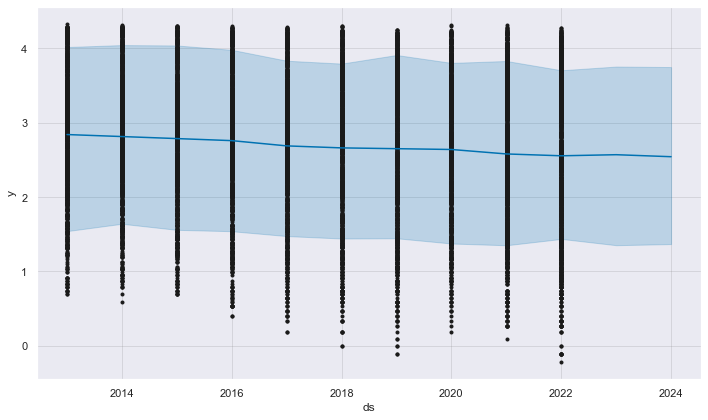

In [177]:
fig1 = model.plot(forecast)

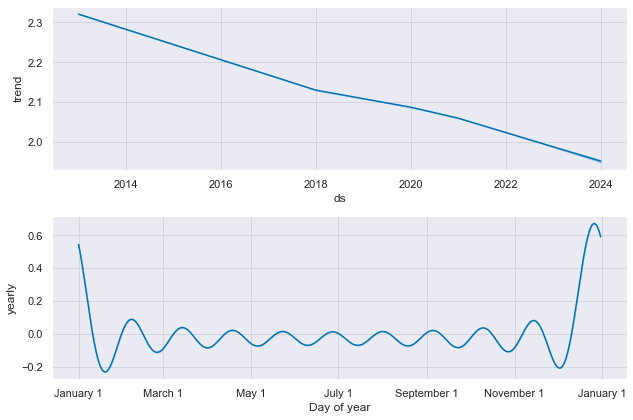

In [178]:
fig2 = model.plot_components(forecast)


In [179]:
# Extract the predicted values for the test set duration
forecasted_values = forecast['yhat'][-len(test_prophet):].values

mae = mean_absolute_error(test_prophet['y'], forecasted_values)
rmse = mean_squared_error(test_prophet['y'], forecasted_values, squared=False)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 0.056073247629859324
RMSE: 0.06975931861023661


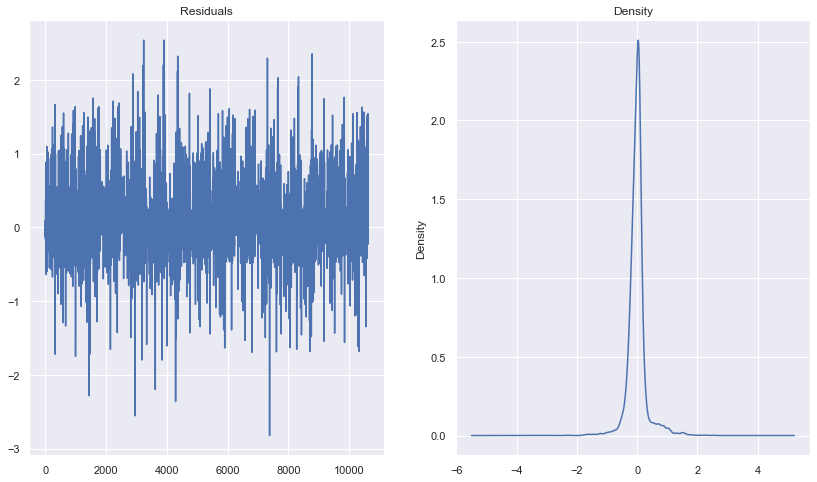

In [180]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind ='kde', ax=ax[1])
plt.show()

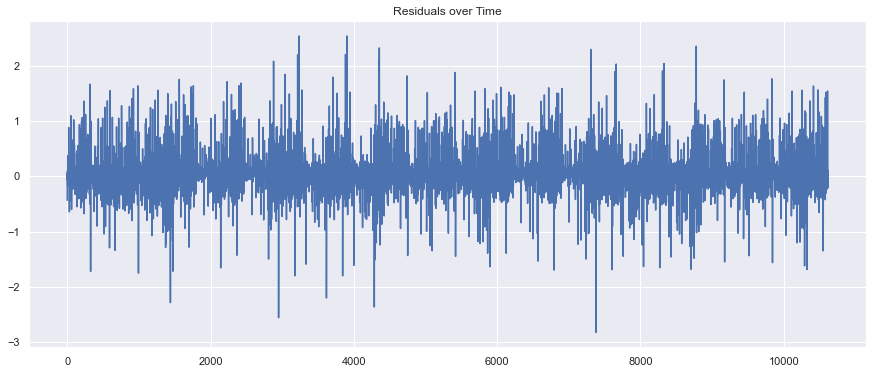

In [181]:
residuals = model_fit.resid
residuals.plot(figsize=(15, 6))
plt.title('Residuals over Time')
plt.show()

OBS_VALUE         sex_F         sex_M         sex_T  \
OBS_VALUE                  1.000000  1.218201e-02 -1.037745e-02 -1.805529e-03   
sex_F                      0.012182  1.000000e+00 -4.998306e-01 -5.001695e-01   
sex_M                     -0.010377 -4.998306e-01  1.000000e+00 -5.000000e-01   
sex_T                     -0.001806 -5.001695e-01 -5.000000e-01  1.000000e+00   
geo_AT                    -0.012587 -3.346911e-16  5.602845e-05 -5.601579e-05   
geo_BE                    -0.004518 -3.297349e-16  5.602845e-05 -5.601579e-05   
geo_BG                     0.005292 -2.915053e-16  5.602845e-05 -5.601579e-05   
geo_CH                    -0.021488 -2.521303e-16  5.602845e-05 -5.601579e-05   
geo_CY                     0.005960 -3.787340e-16  5.602845e-05 -5.601579e-05   
geo_CZ                    -0.014049 -3.840618e-16  5.602845e-05 -5.601579e-05   
geo_DE                    -0.025727 -4.939408e-16  5.602845e-05 -5.601579e-05   
geo_DK                    -0.024151 -4.043464e-16  5.602845e-05 -5.601579e-05   
geo_EE                    -0.010121 -1.255369e-03  6.836381e-04  5.717440e-04   
geo_EL                     0.057151 -2.123139e-16  5.602845e-05 -5.601579e-05   
geo_ES                     0.042187 -2.860733e-16  5.602845e-05 -5.601579e-05   
geo_FI                    -0.003524 -1.680706e-16  5.602845e-05 -5.601579e-05   
geo_FR                     0.000897 -1.635624e-16  5.602845e-05 -5.601579e-05   
geo_HR                     0.008298 -1.402375e-16  5.602845e-05 -5.601579e-05   
geo_HU                    -0.015572 -2.002392e-16  5.602845e-05 -5.601579e-05   
geo_IE                    -0.008593 -3.216422e-16  5.602845e-05 -5.601579e-05   
geo_IS                    -0.026923 -4.043822e-16  5.602845e-05 -5.601579e-05   
geo_IT                     0.002517 -4.115771e-16  5.602845e-05 -5.601579e-05   
geo_LT                     0.012745 -3.990121e-16  5.602845e-05 -5.601579e-05   
geo_LU                    -0.029217 -3.527322e-16  5.602845e-05 -5.601579e-05   
geo_LV                     0.004358 -4.238685e-16  5.602845e-05 -5.601579e-05   
geo_ME                     0.042991  3.590204e-16  4.758218e-05 -4.757143e-05   
geo_MK                     0.057211  2.858788e-16  4.758218e-05 -4.757143e-05   
geo_MT                    -0.027036  1.258470e-03 -2.461489e-03  1.202604e-03   
geo_NL                    -0.022975 -2.783667e-16  5.602845e-05 -5.601579e-05   
geo_NO                    -0.024529 -3.144065e-16  5.602845e-05 -5.601579e-05   
geo_PL                    -0.012021 -3.230776e-16  5.602845e-05 -5.601579e-05   
geo_PT                    -0.002431 -3.286432e-16  5.602845e-05 -5.601579e-05   
geo_RO                    -0.017506 -2.681186e-17  6.579592e-05 -6.578105e-05   
geo_RS                     0.024247 -3.048817e-16  5.602845e-05 -5.601579e-05   
geo_SE                     0.003457 -1.900513e-16  5.602845e-05 -5.601579e-05   
geo_SI                    -0.002859 -1.509615e-16  5.602845e-05 -5.601579e-05   
geo_SK                     0.046685 -1.802902e-16  5.602845e-05 -5.601579e-05   
geo_TR                     0.010380  5.188535e-16  4.758218e-05 -4.757143e-05   
unit_PC_ACT               -0.678977  5.490446e-16  1.669609e-16 -6.509863e-16   
unit_PC_UNE                0.678977 -4.287424e-16 -5.629166e-16  9.163928e-16   
age_encoded               -0.021825 -4.934538e-04  3.168898e-04  1.765799e-04   
isced11_encoded           -0.179659  5.218396e-04 -6.524322e-04  1.305041e-04   
Transformedlog_OBS_VALUE   0.905537  2.347355e-02 -2.605804e-02  2.581252e-03   
y                          0.905537  2.347355e-02 -2.605804e-02  2.581252e-03   

                                geo_AT        geo_BE        geo_BG  \
OBS_VALUE                -1.258689e-02 -4.517699e-03  5.292302e-03   
sex_F                    -3.346911e-16 -3.297349e-16 -2.915053e-16   
sex_M                     5.602845e-05  5.602845e-05  5.602845e-05   
sex_T                    -5.601579e-05 -5.601579e-05 -5.601579e-05   
geo_AT                    1.00

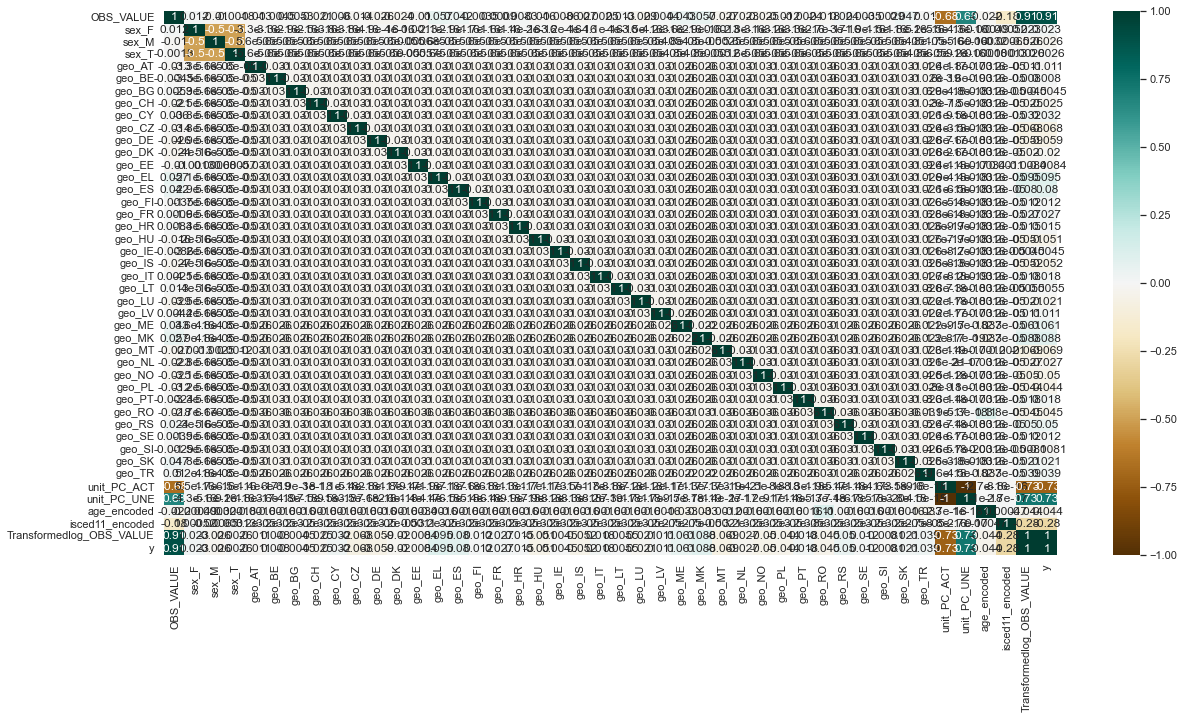

In [182]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

# Linear Regression

In [183]:
sns.reset_orig()
%matplotlib inline

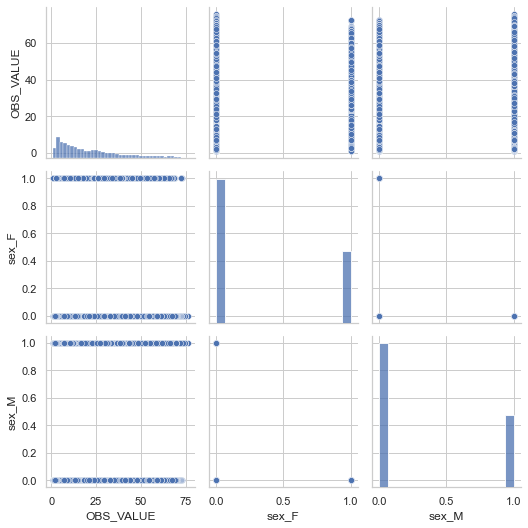

In [184]:
# import the libraries for the plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', context='notebook')


cols = [ 'OBS_VALUE', 'TIME_PERIOD','sex_F', 'sex_M']


sns.pairplot(df[cols], height = 2.5)

plt.tight_layout()

# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

In [185]:
for col in cols:
    print(col, df[col].dtype)


OBS_VALUE float64
TIME_PERIOD datetime64[ns]
sex_F uint8
sex_M uint8


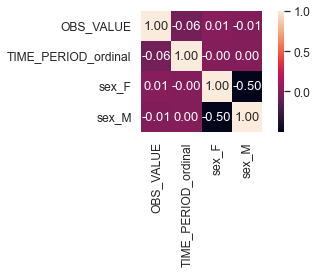

In [186]:
# Convert datetime to ordinal
df['TIME_PERIOD_ordinal'] = df['TIME_PERIOD'].apply(lambda x: x.toordinal())

cols[cols.index('TIME_PERIOD')] = 'TIME_PERIOD_ordinal'  # Update the column name in the list

# Recalculate the correlation matrix
cm = np.corrcoef(df[cols].values.T)

# Recalculate the correlation matrix
cm = np.corrcoef(df[cols].values.T)

# Continue with the heatmap
sns.set(font_scale = 1.1)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 13},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
plt.show()


In [187]:
X = df[['TIME_PERIOD']].values
y = df[['OBS_VALUE']].values

In [188]:
X.shape, y.shape

((13278, 1), (13278, 1))

In [189]:
from sklearn.preprocessing import StandardScaler

# Initialise the objects using StandardScaler() 
sc_x = StandardScaler()
sc_y = StandardScaler()

# Train the objects using fit_transform()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [190]:
# Reshape the (13278, 1) to (13278,) array for Machine Learning model
y_std = np.reshape(y_std, 13278)

# Display the number of rows and columns
X_std.shape, y_std.shape

((13278, 1), (13278,))

In [191]:
from sklearn.linear_model import LinearRegression
# Initialise an object (lr) using the created function LinearRegression()
lr = LinearRegression()

# Train the model by calling fit() mentiof
lr.fit(X_std, y_std)

LinearRegression()

In [192]:
# Predictions
y_pred = lr.predict(X_std)

In [193]:
# Method or Function for Linear Regression plot
def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'blue')
    plt.plot(X, model.predict(X), color = 'red', linewidth = 2)    
    return

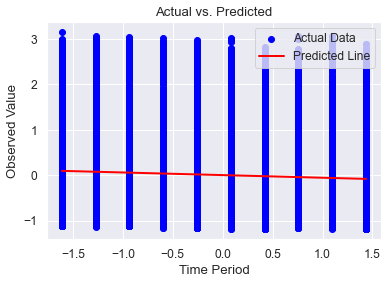

In [194]:
# Plotting
plt.scatter(X_std, y_std, color='blue', label='Actual Data')
plt.plot(X_std, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.xlabel('Time Period')
plt.ylabel('Observed Value')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

In [195]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predictions
y_pred = lr.predict(X_std)

# Compute and print metrics
print("Mean Absolute Error (MAE):", mean_absolute_error(y_std, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_std, y_pred))
print("R^2:", r2_score(y_std, y_pred))

Mean Absolute Error (MAE): 0.8116308608103017
Mean Squared Error (MSE): 0.9966394108491652
R^2: 0.003360589150834481


# The KNN Model
After loading, analyzing and preprocessing of the data, it is now time when we feed the data into the KNN model. To do this, we  use sklearn's inbuilt function neighbors which has a class called KNeigborsClassifier in it. Let's start by importing the classifier.

In [196]:
df.head()

TIME_PERIOD isced11     age  OBS_VALUE  sex_F  sex_M  sex_T  geo_AT  geo_BE  \
0  2013-01-01   ED0-2  Y15-74        9.6      1      0      0       1       0   
1  2014-01-01   ED0-2  Y15-74       10.4      1      0      0       1       0   
2  2015-01-01   ED0-2  Y15-74       10.0      1      0      0       1       0   
3  2016-01-01   ED0-2  Y15-74       11.3      1      0      0       1       0   
4  2017-01-01   ED0-2  Y15-74       11.6      1      0      0       1       0   

   geo_BG  ...  geo_TR  unit_PC_ACT  unit_PC_UNE  age_encoded  \
0       0  ...       0            1            0            0   
1       0  ...       0            1            0            0   
2       0  ...       0            1            0            0   
3       0  ...       0            1            0            0   
4       0  ...       0            1            0            0   

   isced11_encoded       year  Transformedlog_OBS_VALUE                  ds  \
0                0 2013-01-01                  2.261763 2013-01-01 12:00:00   
1                0 2014-01-01                  2.341806 2014-01-01 12:00:00   
2                0 2015-01-01                  2.302585 2015-01-01 12:00:00   
3                0 2016-01-01                  2.424803 2016-01-01 12:00:00   
4                0 2017-01-01                  2.451005 2017-01-01 12:00:00   

          y  TIME_PERIOD_ordinal  
0  2.261763               734869  
1  2.341806               735234  
2  2.302585               735599  
3  2.424803               735964  
4  2.451005               736330  

[5 rows x 50 columns]

In [197]:
df.iloc[:, [3]]

OBS_VALUE
0            9.6
1           10.4
2           10.0
3           11.3
4           11.6
...          ...
13273       29.6
13274       34.9
13275       32.6
13276       14.4
13277       12.9

[13278 rows x 1 columns]

In [198]:
df.iloc[:,[41,42]]

unit_PC_ACT  unit_PC_UNE
0                1            0
1                1            0
2                1            0
3                1            0
4                1            0
...            ...          ...
13273            0            1
13274            0            1
13275            0            1
13276            0            1
13277            0            1

[13278 rows x 2 columns]

In [199]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(df.iloc[:, [3]], 
                                                                df.iloc[:,[41,42]], test_size=0.2, random_state=42)

In [200]:
train_data.shape,train_label.shape,test_data.shape,test_label.shape

((10622, 1), (10622, 2), (2656, 1), (2656, 2))

In [201]:
from sklearn.neighbors import KNeighborsClassifier

In [202]:
neighbors = np.arange(1, 9)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))

In [203]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(train_data, train_label)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)  
    

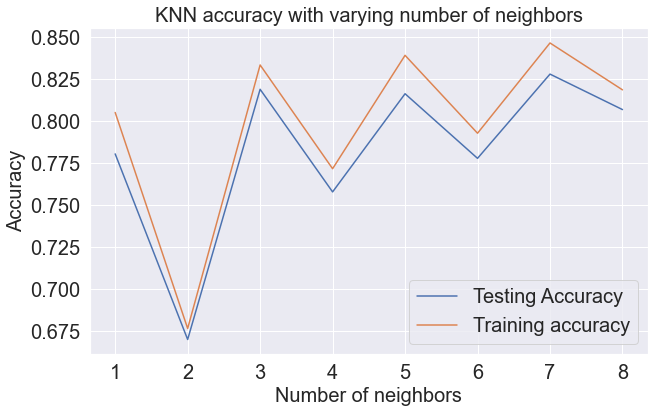

In [204]:
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [205]:
# Declare and initialise an object 'KNeighborsClassifier' with 3 neighbors
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the model
knn.fit(train_data, train_label)

# Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

# Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)

In [206]:
print(test_accuracy)

0.8189006024096386


## Grid Search Cv for KNN


In [207]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
knn_pipe = Pipeline([('mms', MinMaxScaler()), ('knn', KNeighborsClassifier())])
params = [{'knn__n_neighbors': [3, 5, 7, 9],'knn__weights': ['uniform', 'distance'],'knn__leaf_size': [15, 20]}]
gs_knn = GridSearchCV(knn_pipe, param_grid=params, scoring='accuracy',cv=5)
gs_knn.fit(test_data, test_label)
gs_knn.best_params_
Output:{'knn__leaf_size': 15, 'knn__n_neighbors': 5, 'knn__weights': 'distance'}
# find best model score
gs_knn.score(test_data, test_label)

0.8569277108433735

In [208]:
df.head(2)

TIME_PERIOD isced11     age  OBS_VALUE  sex_F  sex_M  sex_T  geo_AT  geo_BE  \
0  2013-01-01   ED0-2  Y15-74        9.6      1      0      0       1       0   
1  2014-01-01   ED0-2  Y15-74       10.4      1      0      0       1       0   

   geo_BG  ...  geo_TR  unit_PC_ACT  unit_PC_UNE  age_encoded  \
0       0  ...       0            1            0            0   
1       0  ...       0            1            0            0   

   isced11_encoded       year  Transformedlog_OBS_VALUE                  ds  \
0                0 2013-01-01                  2.261763 2013-01-01 12:00:00   
1                0 2014-01-01                  2.341806 2014-01-01 12:00:00   

          y  TIME_PERIOD_ordinal  
0  2.261763               734869  
1  2.341806               735234  

[2 rows x 50 columns]

# Decision Tree

In [209]:
# Creating a new column for interaction between 'age' and 'isced11' (education level)
df['age_education_interaction'] = df['age'] + "_" + df['isced11']


In [210]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['age_education_encoded'] = encoder.fit_transform(df['age_education_interaction'])


In [211]:
# Reverting one-hot encoding
conditions = [
    (df['sex_F'] == 1),
    (df['sex_M'] == 1),
    (df['sex_T'] == 1)
]
choices = ['F', 'M', 'T']
df['sex'] = np.select(conditions, choices)

# Encoding the 'sex' column
le = LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['sex'])


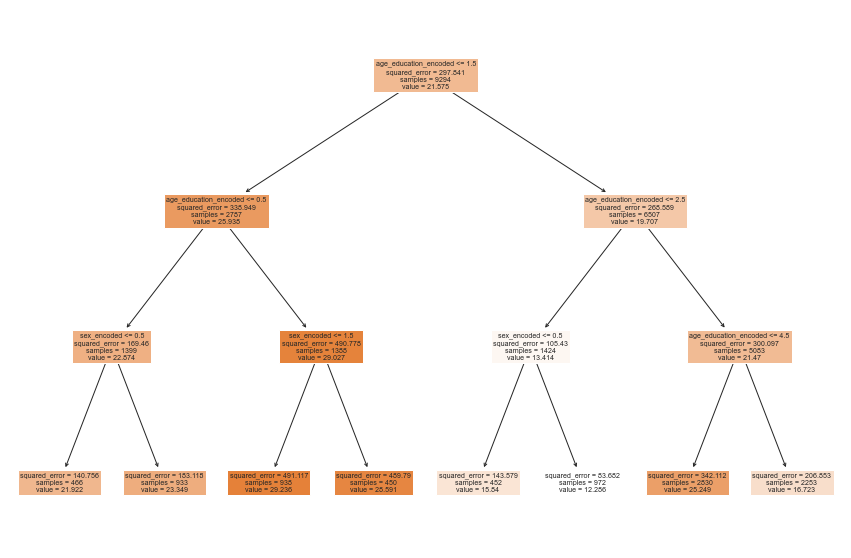

In [212]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
# Using encoded 'sex' and interaction term as features
X = df[['sex_encoded', 'age_education_encoded']].values  
y = df['OBS_VALUE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = DecisionTreeRegressor(max_depth=3, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# For visualizing the Decision Tree:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(regressor, filled=True, feature_names=['sex_encoded', 'age_education_encoded'])
plt.show()


## Naive Bayes and Support Vector Machine

In [213]:
df.head(2)

TIME_PERIOD isced11     age  OBS_VALUE  sex_F  sex_M  sex_T  geo_AT  geo_BE  \
0  2013-01-01   ED0-2  Y15-74        9.6      1      0      0       1       0   
1  2014-01-01   ED0-2  Y15-74       10.4      1      0      0       1       0   

   geo_BG  ...  isced11_encoded       year  Transformedlog_OBS_VALUE  \
0       0  ...                0 2013-01-01                  2.261763   
1       0  ...                0 2014-01-01                  2.341806   

                   ds         y  TIME_PERIOD_ordinal  \
0 2013-01-01 12:00:00  2.261763               734869   
1 2014-01-01 12:00:00  2.341806               735234   

   age_education_interaction  age_education_encoded  sex  sex_encoded  
0               Y15-74_ED0-2                      0    F            0  
1               Y15-74_ED0-2                      0    F            0  

[2 rows x 54 columns]

In [214]:
df.iloc[:, [3,4,5,6,-10]]

OBS_VALUE  sex_F  sex_M  sex_T  isced11_encoded
0            9.6      1      0      0                0
1           10.4      1      0      0                0
2           10.0      1      0      0                0
3           11.3      1      0      0                0
4           11.6      1      0      0                0
...          ...    ...    ...    ...              ...
13273       29.6      0      0      1                2
13274       34.9      0      0      1                2
13275       32.6      0      0      1                2
13276       14.4      0      0      1                2
13277       12.9      0      0      1                2

[13278 rows x 5 columns]

In [215]:
df.iloc[:,2]

0        Y15-74
1        Y15-74
2        Y15-74
3        Y15-74
4        Y15-74
          ...  
13273    Y25-74
13274    Y25-74
13275    Y25-74
13276    Y25-74
13277    Y25-74
Name: age, Length: 13278, dtype: object

In [216]:
# Spliting the dataset into independent and dependent variables
X = df.iloc[:, [3,4,5,6,-10]].values
y = df.iloc[:,2].values
# print(X, y)

In [217]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

# Display the rows and coulmns of X, y, X_train, y_train, X_test, y_test
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13278, 5), (13278,), (10622, 5), (10622,), (2656, 5), (2656,))

In [218]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler

# Create and initialise an object sc by calling a method StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transforms the test data
X_test = sc.transform(X_test)

In [219]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB

# Create and initialise an object sc by calling a method GaussianNB()
nvclassifier = GaussianNB()

# Train the model by calling a method fit()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [220]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)

# Display the predicted values
print(y_pred)

['Y15-74' 'Y15-74' 'Y15-74' ... 'Y15-74' 'Y15-74' 'Y15-74']


In [221]:
# Check the actual and predicted value side by side
y_compare = np.vstack((y_test, y_pred)).T
# actual value on the left side and predicted value on the right hand side
# printing the top 10 values
y_compare[:10, :]

array([['Y20-64', 'Y15-74'],
       ['Y15-74', 'Y15-74'],
       ['Y20-64', 'Y15-74'],
       ['Y15-74', 'Y15-74'],
       ['Y15-74', 'Y20-64'],
       ['Y20-64', 'Y15-74'],
       ['Y15-74', 'Y15-74'],
       ['Y15-74', 'Y15-74'],
       ['Y15-74', 'Y15-74'],
       ['Y15-74', 'Y15-74']], dtype=object)

In [222]:
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 984  179    0]
 [1082  172    0]
 [ 203   36    0]]


In [223]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.4352409638554217
Accuracy: 0.44


# Use Of Cross Validation

In [224]:
from sklearn.model_selection import cross_val_score
nvclassifier = GaussianNB()
cross_val_score(nvclassifier, X, y, scoring='accuracy', cv = 20).mean()

0.44765828017954173

              precision    recall  f1-score   support

      Y15-74       0.44      0.75      0.56      1163
      Y20-64       0.46      0.25      0.32      1254
      Y25-74       0.00      0.00      0.00       239

    accuracy                           0.45      2656
   macro avg       0.30      0.33      0.29      2656
weighted avg       0.41      0.45      0.40      2656



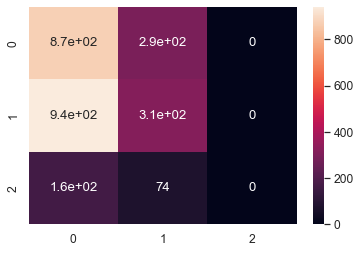

In [225]:
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()
X_train_scaled = n_scaler.fit_transform(X_train.astype(np.float))
X_test_scaled = n_scaler.transform(X_test.astype(np.float))

#Support Vector Classification model -  apply on scaled data
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_scaled = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_scaled))

# GridSearchCV

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.428 total time=  10.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.458 total time=  10.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.451 total time=  10.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.453 total time=   8.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.453 total time=   6.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.443 total time=  11.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.456 total time=  11.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.456 total time=  11.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.456 total time=  11.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.456 total time=  11.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.456 total time=  10.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.457 total time= 1.1min
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.451 total time= 1.1min
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.460 total time= 1.2min
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.465 total time= 1.1min
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.456 total time=  24.4s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.468 total time=  25.8s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.448 total time=  24.7s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.455 total time=  23.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.465 total time=  24.5s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.433 total time=  15.6s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.461 total time=  14.9s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.451 total time=  14.3s
[CV 4/5] END ....C=1000, gam

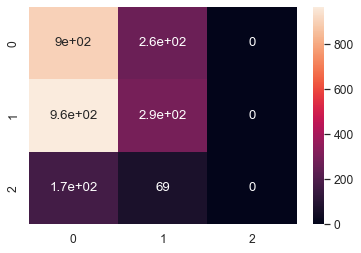

In [226]:
#find best hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose = 4)
grid.fit(X_train_scaled,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test_scaled)
cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))

In [227]:
df.head(2)

TIME_PERIOD isced11     age  OBS_VALUE  sex_F  sex_M  sex_T  geo_AT  geo_BE  \
0  2013-01-01   ED0-2  Y15-74        9.6      1      0      0       1       0   
1  2014-01-01   ED0-2  Y15-74       10.4      1      0      0       1       0   

   geo_BG  ...  isced11_encoded       year  Transformedlog_OBS_VALUE  \
0       0  ...                0 2013-01-01                  2.261763   
1       0  ...                0 2014-01-01                  2.341806   

                   ds         y  TIME_PERIOD_ordinal  \
0 2013-01-01 12:00:00  2.261763               734869   
1 2014-01-01 12:00:00  2.341806               735234   

   age_education_interaction  age_education_encoded  sex  sex_encoded  
0               Y15-74_ED0-2                      0    F            0  
1               Y15-74_ED0-2                      0    F            0  

[2 rows x 54 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

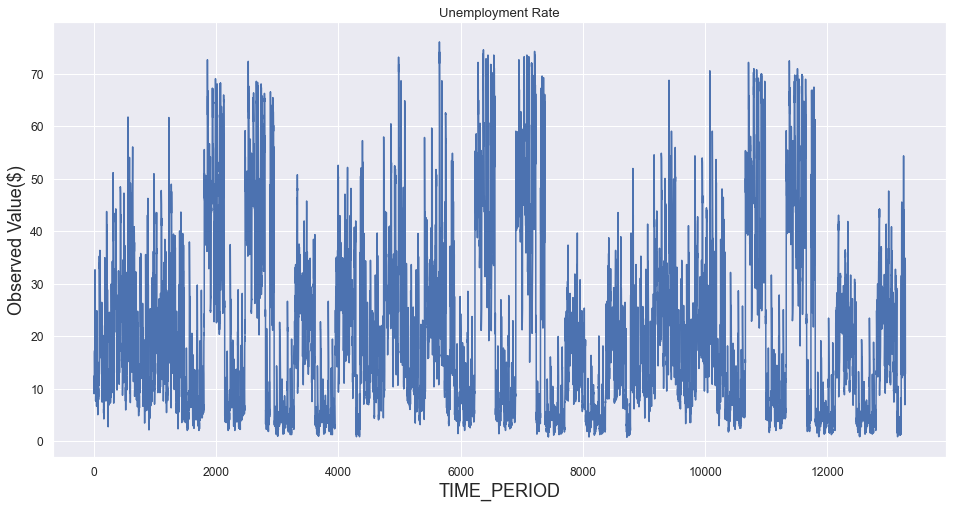

In [228]:
plt.figure(figsize=(16,8))
plt.title('Unemployment Rate')
plt.plot(df['OBS_VALUE'])
plt.xlabel('TIME_PERIOD', fontsize=18)
plt.ylabel('Observed Value($)', fontsize=18)
plt.show

# LSTM

In [229]:
import math
data = df.filter(['OBS_VALUE'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

In [230]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [231]:
# Create training dataset
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []


In [232]:
sequence_length = 30
for i in range(sequence_length, len(train_data)):
    x_train.append(train_data[i-sequence_length:i, 0])
    y_train.append(train_data[i, 0])


In [233]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [234]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Define LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=10)


Epoch 1/10
10593/10593 [==============================] - 222s 20ms/step - loss: 0.0082
Epoch 2/10
10593/10593 [==============================] - 216s 20ms/step - loss: 0.0071
Epoch 3/10
10593/10593 [==============================] - 213s 20ms/step - loss: 0.0069
Epoch 4/10
10593/10593 [==============================] - 231s 22ms/step - loss: 0.0068
Epoch 5/10
10593/10593 [==============================] - 219s 21ms/step - loss: 0.0067
Epoch 6/10
10593/10593 [==============================] - 211s 20ms/step - loss: 0.0066
Epoch 7/10
10593/10593 [==============================] - 210s 20ms/step - loss: 0.0065
Epoch 8/10
10593/10593 [==============================] - 210s 20ms/step - loss: 0.0065
Epoch 9/10
10593/10593 [==============================] - 208s 20ms/step - loss: 0.0065
Epoch 10/10
10593/10593 [==============================] - 206s 19ms/step - loss: 0.0065


In [235]:
# Create testing dataset
test_data = scaled_data[training_data_len-sequence_length:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(sequence_length, len(test_data)):
    x_test.append(test_data[i-sequence_length:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [236]:
# Predict using the model
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

83/83 [==============================] - 3s 15ms/step


In [237]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2_value = r2_score(y_test, predictions)

print("Root Mean Square Error:", rmse)
print("R^2 Value:", r2_value)


Root Mean Square Error: 5.672535786101951
R^2 Value: 0.9156502234712266


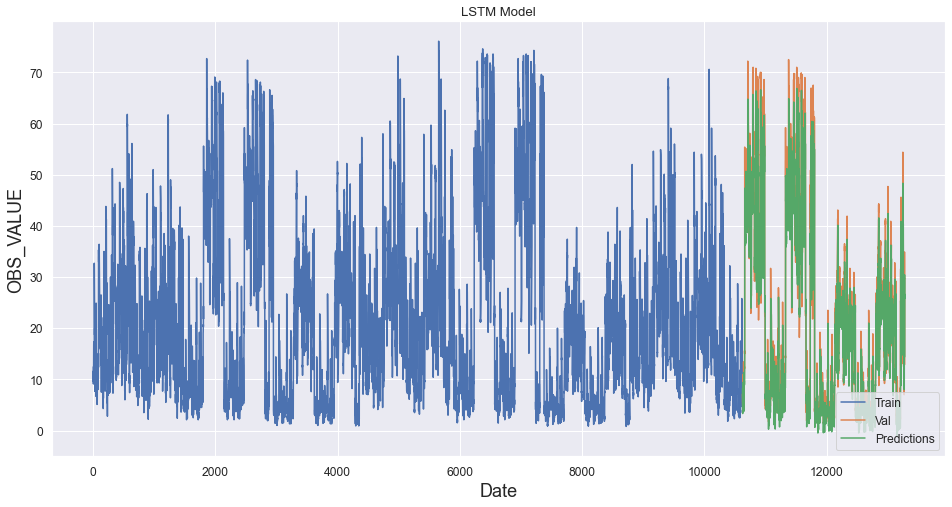

In [238]:
# Plotting
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('OBS_VALUE', fontsize=18)
plt.plot(train['OBS_VALUE'])
plt.plot(valid[['OBS_VALUE', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Statistics


In [239]:
df.describe()

OBS_VALUE         sex_F         sex_M         sex_T        geo_AT  \
count  13278.000000  13278.000000  13278.000000  13278.000000  13278.000000   
mean      21.488816      0.333333      0.333183      0.333484      0.029824   
std       17.295517      0.471422      0.471369      0.471476      0.170107   
min        0.800000      0.000000      0.000000      0.000000      0.000000   
25%        7.500000      0.000000      0.000000      0.000000      0.000000   
50%       16.500000      0.000000      0.000000      0.000000      0.000000   
75%       30.800000      1.000000      1.000000      1.000000      0.000000   
max       76.100000      1.000000      1.000000      1.000000      1.000000   

             geo_BE        geo_BG        geo_CH        geo_CY        geo_CZ  \
count  13278.000000  13278.000000  13278.000000  13278.000000  13278.000000   
mean       0.029824      0.029824      0.029824      0.029824      0.029824   
std        0.170107      0.170107      0.170107      0.170107      0.170107   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...        geo_TR   unit_PC_ACT   unit_PC_UNE   age_encoded  \
count  ...  13278.000000  13278.000000  13278.000000  13278.000000   
mean   ...      0.021690      0.500000      0.500000      0.642115   
std    ...      0.145675      0.500019      0.500019      0.647550   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.500000      0.500000      1.000000   
75%    ...      0.000000      1.000000      1.000000      1.000000   
max    ...      1.000000      1.000000      1.000000      2.000000   

       isced11_encoded  Transformedlog_OBS_VALUE             y  \
count     13278.000000              13278.000000  13278.000000   
mean          0.999849                  2.689067      2.689067   
std           0.816435                  0.942585      0.942585   
min           0.000000                 -0.223144     -0.223144   
25%           0.000000                  2.014903      2.014903   
50%           1.000000                  2.803360      2.803360   
75%           2.000000                  3.427515      3.427515   
max           2.000000                  4.332048      4.332048   

       TIME_PERIOD_ordinal  age_education_encoded   sex_encoded  
count         13278.000000           13278.000000  13278.000000  
mean         736607.077723               2.926194      1.000151  
std            1077.606826               2.107592      0.816620  
min          734869.000000               0.000000      0.000000  
25%          735599.000000               1.000000      0.000000  
50%          736695.000000               3.000000      1.000000  
75%          737791.000000               4.000000      2.000000  
max          738156.000000               8.000000      2.000000  

[8 rows x 47 columns]

In [240]:
from numpy.random import randn
np.random.seed(101)

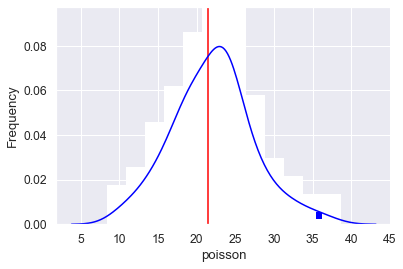

In [241]:
import statistics
from scipy.stats import poisson

x = poisson.rvs(mu =21.488816, size = 101)
plt.axvline(21.488816, color = 'red')
ax = sns.distplot(x, kde= True, color ='blue', hist_kws ={"linewidth":25, 'alpha':1})
ax.set(xlabel='poisson', ylabel='Frequency')
plt.show()

In [242]:
import statistics
statistics.mean(df['OBS_VALUE'])

21.488816086760053

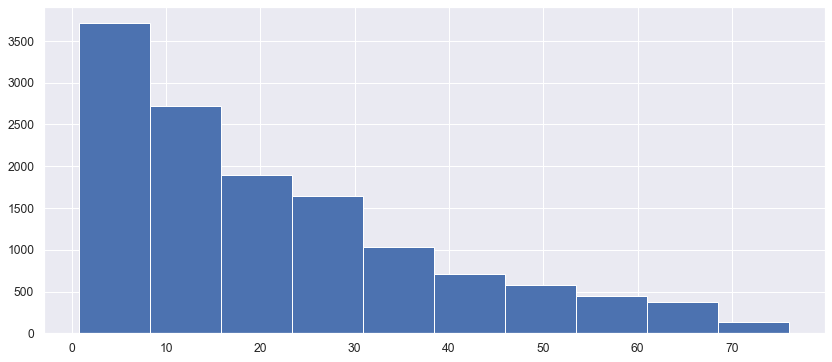

In [243]:
import matplotlib
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(14,6))
pyplot.hist(df['OBS_VALUE'])
pyplot.show()

In [244]:
from scipy.stats import shapiro
DataToTest = df['OBS_VALUE']
stat, p =shapiro(DataToTest)
print('stat=%.2f, p=%.30f' % (stat, p))
if p >0.05:
    print('Observed Values are Normally Distributed')
else:
    print('Observed Values are not Normally Distributed')

stat=0.89, p=0.000000000000000000000000000000
Observed Values are not Normally Distributed


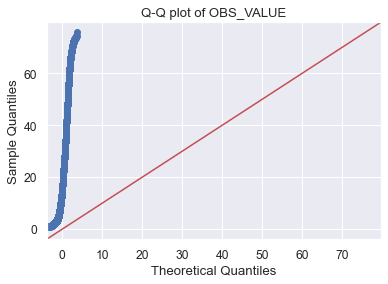

In [245]:
import statsmodels.api as sm
# Q-Q plot
sm.qqplot(df['OBS_VALUE'], line='45')
plt.title('Q-Q plot of OBS_VALUE')
plt.show()

In [246]:
from scipy.stats import normaltest
DataToTest = df['OBS_VALUE']
stat, p = normaltest(DataToTest)
print('stat=%.10f, p=%.10f' % (stat, p))
if p >0.05:
    print('Observed Values are Normally Distributed')
else:
    print('Observed Values are not Normally Distributed')

stat=1625.1690555214, p=0.0000000000
Observed Values are not Normally Distributed


In [247]:
# Square root transformation
df['sqrt_OBS_VALUE'] = np.sqrt(df['OBS_VALUE'])

print(df[['OBS_VALUE', 'sqrt_OBS_VALUE']].head())

   OBS_VALUE  sqrt_OBS_VALUE
0        9.6        3.098387
1       10.4        3.224903
2       10.0        3.162278
3       11.3        3.361547
4       11.6        3.405877


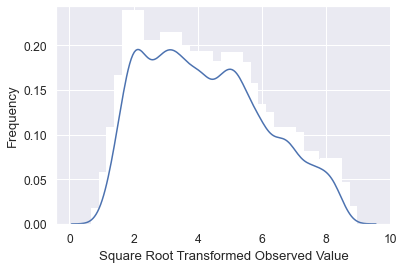

In [248]:
sns.distplot(df['sqrt_OBS_VALUE'], kde=True, hist_kws={"linewidth": 15, 'alpha': 1})
plt.xlabel('Square Root Transformed Observed Value')
plt.ylabel('Frequency')
plt.show()

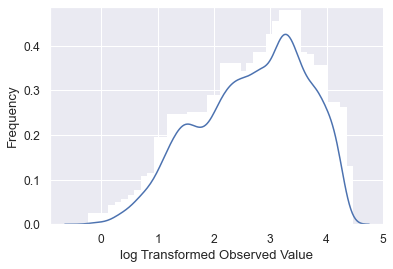

In [249]:
sns.distplot(df['Transformedlog_OBS_VALUE'], kde=True, hist_kws={"linewidth": 15, 'alpha': 1})
plt.xlabel('log Transformed Observed Value')
plt.ylabel('Frequency')
plt.show()

In [250]:
from scipy.stats import normaltest
DataToTest = df['sqrt_OBS_VALUE']
stat, p = normaltest(DataToTest)
print('stat=%.10f, p=%.10f' % (stat, p))
if p >0.05:
    print('Observed Values are Normally Distributed')
else:
    print('Observed Values are not Normally Distributed')

stat=1345.1868793590, p=0.0000000000
Observed Values are not Normally Distributed


In [251]:
from scipy.stats import normaltest
DataToTest = df['Transformedlog_OBS_VALUE']
stat, p = normaltest(DataToTest)
print('stat=%.10f, p=%.10f' % (stat, p))
if p >0.05:
    print('Observed Values are Normally Distributed')
else:
    print('Observed Values are not Normally Distributed')

stat=960.5668045920, p=0.0000000000
Observed Values are not Normally Distributed


In [252]:
from scipy.stats import mannwhitneyu

# Filtering the data for Male, Female, and Total
group1 = df[df['sex'] == 'M']['OBS_VALUE'].values
group2 = df[df['sex'] == 'F']['OBS_VALUE'].values
group3 = df[df['sex'] == 'T']['OBS_VALUE'].values

# Comparison functions
def compare_groups(g1, g2):
    stat, p = mannwhitneyu(g1, g2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print("Same distribution (fail to reject H0)")
    else:
        print("Different distribution (reject H0)")
    print("----------------------")

print("Comparing M vs F:")
compare_groups(group1, group2)

print("Comparing M vs T:")
compare_groups(group1, group3)

print("Comparing F vs T:")
compare_groups(group2, group3)


Comparing M vs F:
Statistics=9359056.500, p=0.000
Different distribution (reject H0)
----------------------
Comparing M vs T:
Statistics=9550757.000, p=0.042
Different distribution (reject H0)
----------------------
Comparing F vs T:
Statistics=10005908.000, p=0.086
Same distribution (fail to reject H0)
----------------------


# Survey Findings

In [253]:
import pandas as pd

# Maximum number of survey respondents
max_length = 63

# Sample data representation
data = {
    'Q1_Age_18_or_older': ['Agree']*63,
    'Q2_No_Medical_Conditions': ['Agree']*63,
    'Q3_Gender': ['Male']*26 + ['Female']*37 + [None]*(max_length - 63),
    'Q4_Unemployment_due_to_gender': ['Yes']*14 + ['No']*47 + ['Prefer not to say']*2,
    'Q5_Age_Range': ['18-24']*2 + ['25-34']*27 + ['35-44']*22 + ['45-54']*10 + ['55-64']*2 + [None]*(max_length - 63),
    'Q6_Age_impact_on_job_opportunities': ['No Impact']*11 + ['Moderate Impact']*30 + ['High Impact']*21 + [None]*(max_length - 62),
    'Q7_Current_Employment_Status': ['Employed full-time']*37 + ['Employed part-time']*6 + ['Unemployed and looking for work']*10 + ['Unemployed and not currently looking for work']*8 + ['student']*2,
    'Q8_Duration_of_Unemployment': ['Less than 3 months']*1 + ['3-6 months']*1 + ['6-12 months']*6 + ['Over a year']*12 + [None]*(max_length - 20),
    'Q9_Lack_of_Skills_or_Qualifications': ['Technical skills']*14 + ['Soft skills']*6 + ['Advanced degrees or certifications']*11 + ['Work experience in the relevant field']*20 + ['Other']*4 + [None]*(max_length - 55),
    'Q10_Employment_Security_based_on_education': ['Insecure']*9 + ['Neutral']*22 + ['Secure']*32
}

df = pd.DataFrame(data)
print(df)


   Q1_Age_18_or_older Q2_No_Medical_Conditions Q3_Gender  \
0               Agree                    Agree      Male   
1               Agree                    Agree      Male   
2               Agree                    Agree      Male   
3               Agree                    Agree      Male   
4               Agree                    Agree      Male   
..                ...                      ...       ...   
58              Agree                    Agree    Female   
59              Agree                    Agree    Female   
60              Agree                    Agree    Female   
61              Agree                    Agree    Female   
62              Agree                    Agree    Female   

   Q4_Unemployment_due_to_gender Q5_Age_Range  \
0                            Yes        18-24   
1                            Yes        18-24   
2                            Yes        25-34   
3                            Yes        25-34   
4                            Yes  

In [254]:
for column in df.columns:
    print(f"Percentage distribution for {column}:\n")
    print((df[column].value_counts(normalize=True) * 100).round(2))
    print('-'*50)


Percentage distribution for Q1_Age_18_or_older:

Agree    100.0
Name: Q1_Age_18_or_older, dtype: float64
--------------------------------------------------
Percentage distribution for Q2_No_Medical_Conditions:

Agree    100.0
Name: Q2_No_Medical_Conditions, dtype: float64
--------------------------------------------------
Percentage distribution for Q3_Gender:

Female    58.73
Male      41.27
Name: Q3_Gender, dtype: float64
--------------------------------------------------
Percentage distribution for Q4_Unemployment_due_to_gender:

No                   74.60
Yes                  22.22
Prefer not to say     3.17
Name: Q4_Unemployment_due_to_gender, dtype: float64
--------------------------------------------------
Percentage distribution for Q5_Age_Range:

25-34    42.86
35-44    34.92
45-54    15.87
18-24     3.17
55-64     3.17
Name: Q5_Age_Range, dtype: float64
--------------------------------------------------
Percentage distribution for Q6_Age_impact_on_job_opportunities:

Moderate

In [255]:
age_order = {
    '18-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55-64': 5,
    '65+': 6,
    'Prefer not to say': None
}

unemployment_duration_order = {
    'Less than 3 months': 1,
    '3-6 months': 2,
    '6-12 months': 3,
    'Over a year': 4,
    'None': None
}


In [256]:
df['Q5_Age_Range_ordinal'] = df['Q5_Age_Range'].map(age_order)
df['Q8_Duration_of_Unemployment_ordinal'] = df['Q8_Duration_of_Unemployment'].map(unemployment_duration_order)

In [257]:
print(f"Median for Q5_Age_Range: {df['Q5_Age_Range_ordinal'].median()}")
print(f"Mode for Q5_Age_Range: {df['Q5_Age_Range_ordinal'].mode().iloc[0]}")

print(f"Median for Q8_Duration_of_Unemployment: {df['Q8_Duration_of_Unemployment_ordinal'].median()}")
print(f"Mode for Q8_Duration_of_Unemployment: {df['Q8_Duration_of_Unemployment_ordinal'].mode().iloc[0]}")


Median for Q5_Age_Range: 3.0
Mode for Q5_Age_Range: 2.0
Median for Q8_Duration_of_Unemployment: 4.0
Mode for Q8_Duration_of_Unemployment: 4.0


In [258]:
age_impact_order = {
    'No Impact': 1,
    'Moderate Impact': 2,
    'High Impact': 3,
    'None': None
}
df['Q6_Age_impact_on_job_opportunities_ordinal'] = df['Q6_Age_impact_on_job_opportunities'].map(age_impact_order)

In [259]:
employment_security_order = {
    'Insecure': 1,
    'Neutral': 2,
    'Secure': 3,
    'None': None
}
df['Q10_Employment_Security_based_on_education_ordinal'] = df['Q10_Employment_Security_based_on_education'].map(employment_security_order)


In [260]:
questions_ordinal = [
    'Q5_Age_Range_ordinal', 
    'Q6_Age_impact_on_job_opportunities_ordinal', 
    'Q8_Duration_of_Unemployment_ordinal', 
    'Q10_Employment_Security_based_on_education_ordinal'
]

for question in questions_ordinal:
    print(f"Median for {question}: {df[question].median()}")
    print(f"Mode for {question}: {df[question].mode().iloc[0]}")
    print("-"*50)

Median for Q5_Age_Range_ordinal: 3.0
Mode for Q5_Age_Range_ordinal: 2.0
--------------------------------------------------
Median for Q6_Age_impact_on_job_opportunities_ordinal: 2.0
Mode for Q6_Age_impact_on_job_opportunities_ordinal: 2.0
--------------------------------------------------
Median for Q8_Duration_of_Unemployment_ordinal: 4.0
Mode for Q8_Duration_of_Unemployment_ordinal: 4.0
--------------------------------------------------
Median for Q10_Employment_Security_based_on_education_ordinal: 3.0
Mode for Q10_Employment_Security_based_on_education_ordinal: 3.0
--------------------------------------------------


# CrossTab

# Gender vs Age Range

In [261]:
cross_genderUn = pd.crosstab(df['Q3_Gender'], df['Q4_Unemployment_due_to_gender'], margins=True, margins_name="Total")
print(cross_genderUn)

Q4_Unemployment_due_to_gender  No  Prefer not to say  Yes  Total
Q3_Gender                                                       
Female                         35                  2    0     37
Male                           12                  0   14     26
Total                          47                  2   14     63


In [262]:
from scipy.stats import chi2_contingency

# Given cross_genderUn table
chi2, p, _, _ = chi2_contingency(cross_genderUn.iloc[:-1, :-1])

print(f"Chi2 value between Gender and Unemployment due to Gender Identity: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Gender and Unemployment due to Gender Identity are dependent (statistically significant).")
else:
    print("Gender and Unemployment due to Gender Identity are independent (not statistically significant).")


Chi2 value between Gender and Unemployment due to Gender Identity: 26.131331003671423
P-value: 2.1166720258450035e-06
Gender and Unemployment due to Gender Identity are dependent (statistically significant).


# Age vs Employment Status

In [263]:
cross_agevsjob = pd.crosstab(df['Q5_Age_Range'], df['Q7_Current_Employment_Status'])
print(cross_agevsjob)

Q7_Current_Employment_Status  Employed full-time  Employed part-time  \
Q5_Age_Range                                                           
18-24                                          2                   0   
25-34                                         27                   0   
35-44                                          8                   6   
45-54                                          0                   0   
55-64                                          0                   0   

Q7_Current_Employment_Status  Unemployed and looking for work  \
Q5_Age_Range                                                    
18-24                                                       0   
25-34                                                       0   
35-44                                                       8   
45-54                                                       2   
55-64                                                       0   

Q7_Current_Employment_Status  Unemploye

In [264]:
# Using cross_agevsjob
chi2, p, _, _ = chi2_contingency(cross_agevsjob)

print(f"Chi2 value between Age Range and Current Employment Status: {chi2}")
print(f"P-value: {p}")


Chi2 value between Age Range and Current Employment Status: 142.76078624078625
P-value: 2.0731349074160367e-22


# Employment vs Skill lacking

In [265]:
cross_emplvsskill = pd.crosstab(df['Q7_Current_Employment_Status'], df['Q9_Lack_of_Skills_or_Qualifications'])
print(cross_emplvsskill)

Q9_Lack_of_Skills_or_Qualifications            Advanced degrees or certifications  \
Q7_Current_Employment_Status                                                        
Employed full-time                                                             11   
Employed part-time                                                              0   
Unemployed and looking for work                                                 0   
Unemployed and not currently looking for work                                   0   

Q9_Lack_of_Skills_or_Qualifications            Other  Soft skills  \
Q7_Current_Employment_Status                                        
Employed full-time                                 0            6   
Employed part-time                                 0            0   
Unemployed and looking for work                    2            0   
Unemployed and not currently looking for work      2            0   

Q9_Lack_of_Skills_or_Qualifications            Technical skills  \
Q7_Curr

In [266]:
# Using cross_emplvsskill
chi2, p, _, _ = chi2_contingency(cross_emplvsskill)

print(f"Chi2 value between Current Employment Status and Lack of Skills/Qualifications: {chi2}")
print(f"P-value: {p}")


Chi2 value between Current Employment Status and Lack of Skills/Qualifications: 60.85675675675675
P-value: 1.5747944209431426e-08


# Gender and employment Security

In [267]:
cross_genvsempsec = pd.crosstab(df['Q3_Gender'], df['Q10_Employment_Security_based_on_education'])
print(cross_genvsempsec)

Q10_Employment_Security_based_on_education  Insecure  Neutral  Secure
Q3_Gender                                                            
Female                                             0        5      32
Male                                               9       17       0


In [268]:
# Using cross_genvsempsec
chi2, p, _, _ = chi2_contingency(cross_genvsempsec)

print(f"Chi2 value between Gender and Employment Security based on Education: {chi2}")
print(f"P-value: {p}")


Chi2 value between Gender and Employment Security based on Education: 47.059487809487806
P-value: 6.041740412412809e-11


# Age Impact on Jobs and Actual Age:

In [269]:
cross_agevsjob = pd.crosstab(df['Q5_Age_Range'], df['Q6_Age_impact_on_job_opportunities'])
print(cross_agevsjob)

Q6_Age_impact_on_job_opportunities  High Impact  Moderate Impact  No Impact
Q5_Age_Range                                                               
18-24                                         0                0          2
25-34                                         0               18          9
35-44                                        10               12          0
45-54                                        10                0          0
55-64                                         1                0          0


In [270]:
# Using cross_agevsjob (second instance provided)
chi2, p, _, _ = chi2_contingency(cross_agevsjob)

print(f"Chi2 value between Age Range and Age Impact on Job Opportunities: {chi2}")
print(f"P-value: {p}")


Chi2 value between Age Range and Age Impact on Job Opportunities: 50.40519480519481
P-value: 3.415658070669805e-08


# Employment Status vs Age

In [271]:
cross_emplvsage = pd.crosstab(df['Q7_Current_Employment_Status'], df['Q8_Duration_of_Unemployment'])
print(cross_emplvsage)

Q8_Duration_of_Unemployment   3-6 months  6-12 months  Less than 3 months  \
Q7_Current_Employment_Status                                                
Employed full-time                     1            6                   1   

Q8_Duration_of_Unemployment   Over a year  
Q7_Current_Employment_Status               
Employed full-time                     12  


In [272]:
# Using cross_emplvsage
chi2, p, _, _ = chi2_contingency(cross_emplvsage)

print(f"Chi2 value between Current Employment Status and Duration of Unemployment: {chi2}")
print(f"P-value: {p}")


Chi2 value between Current Employment Status and Duration of Unemployment: 0.0
P-value: 1.0


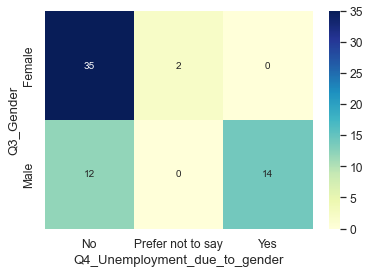

In [273]:
cross_genderUn = pd.crosstab(df['Q3_Gender'], df['Q4_Unemployment_due_to_gender'])
sns.heatmap(cross_genderUn, annot=True, cmap="YlGnBu")
plt.show()


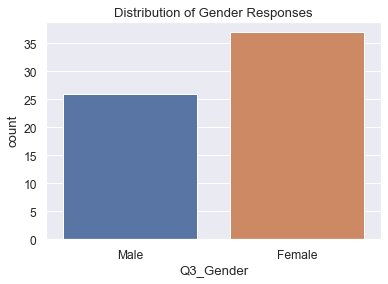

In [274]:
# Example for Q3_Gender
sns.countplot(data=df, x='Q3_Gender')
plt.title('Distribution of Gender Responses')
plt.show()

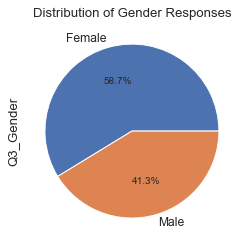

In [275]:
# Example for Q3_Gender
df['Q3_Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Gender Responses')
plt.show()


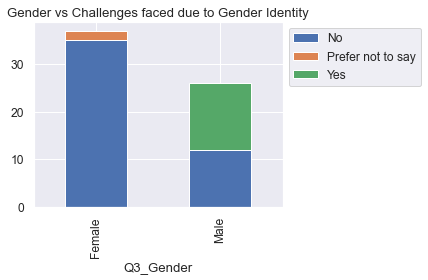

In [276]:
# Using pandas crosstab for stacked bar chart
ct = pd.crosstab(df['Q3_Gender'], df['Q4_Unemployment_due_to_gender'])
ct.plot(kind='bar', stacked=True)

plt.title('Gender vs Challenges faced due to Gender Identity')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Correlation Analysis

In [277]:
#map the Q6 responses to a scale:
impact_order = {
    'No Impact': 1,
    'Moderate Impact': 2,
    'High Impact': 3
}

df['Q6_Age_impact_on_job_opportunities_ordinal'] = df['Q6_Age_impact_on_job_opportunities'].map(impact_order)

# Now, we can calculate the correlation:
correlation_value = df['Q5_Age_Range_ordinal'].corr(df['Q6_Age_impact_on_job_opportunities_ordinal'])

print(f"Correlation between Age and Perception about Age Affecting Job Opportunities: {correlation_value}")


Correlation between Age and Perception about Age Affecting Job Opportunities: 0.7747910823586481


### Correlation between Age and Duration of Unemployment

In [278]:
correlation_value = df['Q5_Age_Range_ordinal'].corr(df['Q8_Duration_of_Unemployment_ordinal'])
print(f"Correlation between Age and Duration of Unemployment: {correlation_value}")


Correlation between Age and Duration of Unemployment: 0.8077806958015603


### Correlation between Perception of Age Impact and Employment Security based on Education

In [279]:
correlation_value = df['Q6_Age_impact_on_job_opportunities_ordinal'].corr(df['Q10_Employment_Security_based_on_education_ordinal'])
print(f"Correlation between Perception of Age Impact and Employment Security based on Education: {correlation_value}")


Correlation between Perception of Age Impact and Employment Security based on Education: 0.8457132412356161


### Correlation between Duration of Unemployment and Employment Security based on Education 

In [280]:
correlation_value = df['Q8_Duration_of_Unemployment_ordinal'].corr(df['Q10_Employment_Security_based_on_education_ordinal'])
print(f"Correlation between Duration of Unemployment and Employment Security based on Education: {correlation_value}")


Correlation between Duration of Unemployment and Employment Security based on Education: 0.755645135628868


In [281]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting ordinal columns for clustering
X = df[['Q5_Age_Range_ordinal', 'Q8_Duration_of_Unemployment_ordinal', 'Q6_Age_impact_on_job_opportunities_ordinal', 'Q10_Employment_Security_based_on_education_ordinal']]

# Drop NaN values from the subset
X.dropna(inplace=True)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering
kmeans = KMeans(n_clusters=3)  # Assuming 3 clusters for demonstration
clusters = kmeans.fit_predict(X_scaled)
df.loc[X.index, 'cluster'] = clusters


In [282]:
cluster_summary = df.groupby('cluster')[['Q5_Age_Range_ordinal', 'Q8_Duration_of_Unemployment_ordinal', 'Q6_Age_impact_on_job_opportunities_ordinal', 'Q10_Employment_Security_based_on_education_ordinal']].mean()
print(cluster_summary)


         Q5_Age_Range_ordinal  Q8_Duration_of_Unemployment_ordinal  \
cluster                                                              
0.0                       2.0                             4.000000   
1.0                       2.0                             3.142857   
2.0                       1.0                             1.500000   

         Q6_Age_impact_on_job_opportunities_ordinal  \
cluster                                               
0.0                                        1.818182   
1.0                                        1.000000   
2.0                                        1.000000   

         Q10_Employment_Security_based_on_education_ordinal  
cluster                                                      
0.0                                                    2.0   
1.0                                                    1.0   
2.0                                                    1.0   
